In [2]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
#import geopandas as gpd
from shapely.geometry import Point
import shapely
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.tsa.stattools as sm
from sklearn.metrics import accuracy_score, mean_squared_error,r2_score
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.api import VAR, DynamicVAR
from statsmodels.tsa.base.datetools import dates_from_str
import seaborn as sns

/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  retu

In [3]:
#Getting 2017 data
data = pd.read_excel('/Users/VarshiniSelvadurai/Documents/Internship/Crime_Edited.xlsx', sheet_name = '2017')
#data = pd.read_excel('C:\\Users\\vns8\\Documents\\Crime_Edited.xlsx', sheet_name = '2017')
data = data.loc[data["Crime Name1"] != "Not a Crime"]
data = data.drop(columns = ["Police District Number","Address Number","Victims","CR Number","NIBRS Code","Beat","PRA","State","Incident ID","Offence Code","Sector","Police District Name","Crime Name2","Crime Name3","Agency","Place","End Date/Time","Dispatch Date/Time","Block_Address"])
ugh = list(map(str, data["Start Time"]))
for i in range (0, len(ugh)):
    ugh[i] = ugh[i][:2]
data["Start Time"] = ugh
ugh = (list(map(str,data['Start Date'])))
ughh = []
for i in range(0,len(ugh)):
    ugh[i] = ugh[i][5:]
    ugh[i] = ugh[i][:5]
data['Start Date'] = ugh

In [4]:
#Getting 2018 data
data_2018 = pd.read_excel('/Users/VarshiniSelvadurai/Documents/Internship/Crime_Edited.xlsx', sheet_name = '2018')
#data = pd.read_excel('C:\\Users\\vns8\\Documents\\Crime_Edited.xlsx', sheet_name = '2017')
data_2018 = data_2018.loc[data_2018["Crime Name1"] != "Not a Crime"]
data_2018 = data_2018.drop(columns = ["Police District Number","Address Number","Victims","CR Number","NIBRS Code","Beat","PRA","State","Incident ID","Offence Code","Sector","Police District Name","Crime Name2","Crime Name3","Agency","Place","End Date/Time","Dispatch Date/Time","Block_Address"])
ugh = list(map(str, data_2018["Start Time"]))
for i in range (0, len(ugh)):
    ugh[i] = ugh[i][:2]
data_2018["Start Time"] = ugh
ugh = (list(map(str,data_2018['Start Date'])))
ughh = []
for i in range(0,len(ugh)):
    ugh[i] = ugh[i][5:]
    ugh[i] = ugh[i][:5]
data_2018['Start Date'] = ugh

In [5]:
whatev = list(map(str, data_2018['Start Date'].value_counts().keys().tolist()))
zipcodes = list(map(str, data['Zip Code'].value_counts().keys().tolist()))
ughhh = []
ughhh_2018 = []
for z in zipcodes:
    x = data.loc[data["Zip Code"] == int(z)]
    start_date = ['01-01', '01-02', '01-03', '01-04', '01-05', '01-06', '01-07', '01-08', '01-09', '01-10', '01-11', '01-12', '01-13', '01-14', '01-15', '01-16', '01-17', '01-18', '01-19', '01-20', '01-21', '01-22', '01-23', '01-24', '01-25', '01-26', '01-27', '01-28', '01-29', '01-30', '01-31', '02-01', '02-02', '02-03', '02-04', '02-05', '02-06', '02-07', '02-08', '02-09', '02-10', '02-11', '02-12', '02-13', '02-14', '02-15', '02-16', '02-17', '02-18', '02-19', '02-20', '02-21', '02-22', '02-23', '02-24', '02-25', '02-26', '02-27', '02-28', '03-01', '03-02', '03-03', '03-04', '03-05', '03-06', '03-07', '03-08', '03-09', '03-10', '03-11', '03-12', '03-13', '03-14', '03-15', '03-16', '03-17', '03-18', '03-19', '03-20', '03-21', '03-22', '03-23', '03-24', '03-25', '03-26', '03-27', '03-28', '03-29', '03-30', '03-31', '04-01', '04-02', '04-03', '04-04', '04-05', '04-06', '04-07', '04-08', '04-09', '04-10', '04-11', '04-12', '04-13', '04-14', '04-15', '04-16', '04-17', '04-18', '04-19', '04-20', '04-21', '04-22', '04-23', '04-24', '04-25', '04-26', '04-27', '04-28', '04-29', '04-30', '05-01', '05-02', '05-03', '05-04', '05-05', '05-06', '05-07', '05-08', '05-09', '05-10', '05-11', '05-12', '05-13', '05-14', '05-15', '05-16', '05-17', '05-18', '05-19', '05-20', '05-21', '05-22', '05-23', '05-24', '05-25', '05-26', '05-27', '05-28', '05-29', '05-30', '05-31', '06-01', '06-02', '06-03', '06-04', '06-05', '06-06', '06-07', '06-08', '06-09', '06-10', '06-11', '06-12', '06-13', '06-14', '06-15', '06-16', '06-17', '06-18', '06-19', '06-20', '06-21', '06-22', '06-23', '06-24', '06-25', '06-26', '06-27', '06-28', '06-29', '06-30', '07-01', '07-02', '07-03', '07-04', '07-05', '07-06', '07-07', '07-08', '07-09', '07-10', '07-11', '07-12', '07-13', '07-14', '07-15', '07-16', '07-17', '07-18', '07-19', '07-20', '07-21', '07-22', '07-23', '07-24', '07-25', '07-26', '07-27', '07-28', '07-29', '07-30', '07-31', '08-01', '08-02', '08-03', '08-04', '08-05', '08-06', '08-07', '08-08', '08-09', '08-10', '08-11', '08-12', '08-13', '08-14', '08-15', '08-16', '08-17', '08-18', '08-19', '08-20', '08-21', '08-22', '08-23', '08-24', '08-25', '08-26', '08-27', '08-28', '08-29', '08-30', '08-31', '09-01', '09-02', '09-03', '09-04', '09-05', '09-06', '09-07', '09-08', '09-09', '09-10', '09-11', '09-12', '09-13', '09-14', '09-15', '09-16', '09-17', '09-18', '09-19', '09-20', '09-21', '09-22', '09-23', '09-24', '09-25', '09-26', '09-27', '09-28', '09-29', '09-30', '10-01', '10-02', '10-03', '10-04', '10-05', '10-06', '10-07', '10-08', '10-09', '10-10', '10-11', '10-12', '10-13', '10-14', '10-15', '10-16', '10-17', '10-18', '10-19', '10-20', '10-21', '10-22', '10-23', '10-24', '10-25', '10-26', '10-27', '10-28', '10-29', '10-30', '10-31', '11-01', '11-02', '11-03', '11-04', '11-05', '11-06', '11-07', '11-08', '11-09', '11-10', '11-11', '11-12', '11-13', '11-14', '11-15', '11-16', '11-17', '11-18', '11-19', '11-20', '11-21', '11-22', '11-23', '11-24', '11-25', '11-26', '11-27', '11-28', '11-29', '11-30', '12-01', '12-02', '12-03', '12-04', '12-05', '12-06', '12-07', '12-08', '12-09', '12-10', '12-11', '12-12', '12-13', '12-14', '12-15', '12-16', '12-17', '12-18', '12-19', '12-20', '12-21', '12-22', '12-23', '12-24', '12-25', '12-26', '12-27', '12-28', '12-29', '12-30', '12-31']
    ugh = [0 for i in range(0,len(start_date))]
    ughh = [0 for i in range(0,len(start_date))]
    for index,row in x.iterrows():
        a = start_date.index(row["Start Date"])
        ugh[a] += 1
    march = pd.DataFrame({"Crime Count": ugh, "Date":start_date} )
    ughhh.append(march)
    
    y = data_2018.loc[data_2018["Zip Code"] == int(z)]
    start_date = whatev
    ugh = [0 for i in range(0,len(start_date))]
    ughh = [0 for i in range(0,len(start_date))]
    for index,row in y.iterrows():
        a = start_date.index(row["Start Date"])
        ugh[a] += 1
    march = pd.DataFrame({"Crime Count": ugh, "Date":start_date} )
    ughhh_2018.append(march)

In [5]:
lag = [[i for i in range (0,len(zipcodes))] for j in range (0,len(zipcodes))]
pvalue = [[i for i in range (0,len(zipcodes))] for j in range (0,len(zipcodes))]
reject = [[i for i in range (0,len(zipcodes))] for j in range (0,len(zipcodes))]
i = 0
j = 0
for z in ughhh:
    for z2 in ughhh:
        if i!=j:
            a = 0
            date = pd.DataFrame({zipcodes[i]: list(z["Crime Count"]),zipcodes[j]: list(z2["Crime Count"])})
            try:
                model = VAR(date)
                results = model.fit(ic='aic')
                try:
                    y = results.test_causality(zipcodes[i],zipcodes[j], kind='f')
                    #print (y.summary())
                    #print("LAG: ", results.k_ar)
                    lag[i][j] = (results.k_ar)
                    pvalue[i][j] = y.pvalue
                except:
                    lag[i][j] = -50
                    pvalue[i][j] = 1
            except:
                lag[i][j] = -50
                pvalue[i][j] = 1
                
            if pvalue[i][j]<.05:
                reject[i][j] = 1
            else:
                reject[i][j] = 0
        else:
            lag[i][j] = 0
            pvalue[i][j] = 0
            reject[i][j] = 1
        j += 1
    j = 0
    i += 1

In [6]:
total = 0
for i in range (0,60):
    for j in range (0,60):
        total += reject[i][j]
print(total)

282


In [6]:
laag = pd.DataFrame({"Zip Codes":zipcodes, '20910':lag[0], '20902':lag[1], '20906':lag[2], 
                    '20874':lag[3], '20904':lag[4], '20850':lag[5], '20877':lag[6], 
                    '20878':lag[7], '20852':lag[8], '20901':lag[9], '20814':lag[10], 
                    '20886':lag[11], '20876':lag[12], '20912':lag[13], '20817':lag[14], 
                    '20879':lag[15], '20903':lag[16], '20853':lag[17], '20854':lag[18], 
                    '20815':lag[19], '20832':lag[20], '20895':lag[21], '20851':lag[22], 
                    '20866':lag[23], '20855':lag[24], '20905':lag[25], '20871':lag[26], 
                    '20872':lag[27], '20816':lag[28], '20841':lag[29], '20882':lag[30], 
                    '20833':lag[31], '20837':lag[32], '20860':lag[33], '20861':lag[34], 
                    '20842':lag[35], '20818':lag[36], '20868':lag[37], '20892':lag[38], 
                    '20862':lag[39], '21771':lag[40], '20889':lag[41], '20838':lag[42], 
                    '20839':lag[43], '20894':lag[44], '20783':lag[45], '20707':lag[46], 
                    '20812':lag[47], '20993':lag[48], '20899':lag[49], '20706':lag[50], 
                    '21797':lag[51], '20896':lag[52], '20001':lag[53], '21703':lag[54], 
                    '20777':lag[55], '20012':lag[56], '20705':lag[57], '20008':lag[58], '20004':lag[59]})
pvaalue = pd.DataFrame({"Zip Codes":zipcodes, '20910':pvalue[0], '20902':pvalue[1], '20906':pvalue[2], 
                    '20874':pvalue[3], '20904':pvalue[4], '20850':pvalue[5], '20877':pvalue[6], 
                    '20878':pvalue[7], '20852':pvalue[8], '20901':pvalue[9], '20814':pvalue[10], 
                    '20886':pvalue[11], '20876':pvalue[12], '20912':pvalue[13], '20817':pvalue[14], 
                    '20879':pvalue[15], '20903':pvalue[16], '20853':pvalue[17], '20854':pvalue[18], 
                    '20815':pvalue[19], '20832':pvalue[20], '20895':pvalue[21], '20851':pvalue[22], 
                    '20866':pvalue[23], '20855':pvalue[24], '20905':pvalue[25], '20871':pvalue[26], 
                    '20872':pvalue[27], '20816':pvalue[28], '20841':pvalue[29], '20882':pvalue[30], 
                    '20833':pvalue[31], '20837':pvalue[32], '20860':pvalue[33], '20861':pvalue[34], 
                    '20842':pvalue[35], '20818':pvalue[36], '20868':pvalue[37], '20892':pvalue[38], 
                    '20862':pvalue[39], '21771':pvalue[40], '20889':pvalue[41], '20838':pvalue[42], 
                    '20839':pvalue[43], '20894':pvalue[44], '20783':pvalue[45], '20707':pvalue[46], 
                    '20812':pvalue[47], '20993':pvalue[48], '20899':pvalue[49], '20706':pvalue[50], 
                    '21797':pvalue[51], '20896':pvalue[52], '20001':pvalue[53], '21703':pvalue[54], 
                    '20777':pvalue[55], '20012':pvalue[56], '20705':pvalue[57], '20008':pvalue[58], '20004':pvalue[59]})
reeject = pd.DataFrame({"Zip Codes":zipcodes, '20910':reject[0], '20902':reject[1], '20906':reject[2], 
                    '20874':reject[3], '20904':reject[4], '20850':reject[5], '20877':reject[6], 
                    '20878':reject[7], '20852':reject[8], '20901':reject[9], '20814':reject[10], 
                    '20886':reject[11], '20876':reject[12], '20912':reject[13], '20817':reject[14], 
                    '20879':reject[15], '20903':reject[16], '20853':reject[17], '20854':reject[18], 
                    '20815':reject[19], '20832':reject[20], '20895':reject[21], '20851':reject[22], 
                    '20866':reject[23], '20855':reject[24], '20905':reject[25], '20871':reject[26], 
                    '20872':reject[27], '20816':reject[28], '20841':reject[29], '20882':reject[30], 
                    '20833':reject[31], '20837':reject[32], '20860':reject[33], '20861':reject[34], 
                    '20842':reject[35], '20818':reject[36], '20868':reject[37], '20892':reject[38], 
                    '20862':reject[39], '21771':reject[40], '20889':reject[41], '20838':reject[42], 
                    '20839':reject[43], '20894':reject[44], '20783':reject[45], '20707':reject[46], 
                    '20812':reject[47], '20993':reject[48], '20899':reject[49], '20706':reject[50], 
                    '21797':reject[51], '20896':reject[52], '20001':reject[53], '21703':reject[54], 
                    '20777':reject[55], '20012':reject[56], '20705':reject[57], '20008':reject[58], '20004':reject[59]})

In [ ]:
laag = pd.DataFrame({"Zip Codes":zipcodes, '20910':lag[0], '20902':lag[1], '20906':lag[2], 
                    '20874':lag[3], '20904':lag[4], '20850':lag[5], '20877':lag[6], 
                    '20878':lag[7], '20852':lag[8], '20901':lag[9], '20814':lag[10], 
                    '20886':lag[11], '20876':lag[12], '20912':lag[13], '20817':lag[14], 
                    '20879':lag[15], '20903':lag[16], '20853':lag[17], '20854':lag[18], 
                    '20815':lag[19], '20832':lag[20], '20895':lag[21], '20851':lag[22], 
                    '20866':lag[23], '20855':lag[24], '20905':lag[25], '20871':lag[26], 
                    '20872':lag[27], '20816':lag[28], '20841':lag[29], '20882':lag[30], 
                    '20833':lag[31], '20837':lag[32]})
pvaalue = pd.DataFrame({"Zip Codes":zipcodes, '20910':pvalue[0], '20902':pvalue[1], '20906':pvalue[2], 
                    '20874':pvalue[3], '20904':pvalue[4], '20850':pvalue[5], '20877':pvalue[6], 
                    '20878':pvalue[7], '20852':pvalue[8], '20901':pvalue[9], '20814':pvalue[10], 
                    '20886':pvalue[11], '20876':pvalue[12], '20912':pvalue[13], '20817':pvalue[14], 
                    '20879':pvalue[15], '20903':pvalue[16], '20853':pvalue[17], '20854':pvalue[18], 
                    '20815':pvalue[19], '20832':pvalue[20], '20895':pvalue[21], '20851':pvalue[22], 
                    '20866':pvalue[23], '20855':pvalue[24], '20905':pvalue[25], '20871':pvalue[26], 
                    '20872':pvalue[27], '20816':pvalue[28], '20841':pvalue[29], '20882':pvalue[30], 
                    '20833':pvalue[31], '20837':pvalue[32]})
reeject = pd.DataFrame({"Zip Codes":zipcodes, '20910':reject[0], '20902':reject[1], '20906':reject[2], 
                    '20874':reject[3], '20904':reject[4], '20850':reject[5], '20877':reject[6], 
                    '20878':reject[7], '20852':reject[8], '20901':reject[9], '20814':reject[10], 
                    '20886':reject[11], '20876':reject[12], '20912':reject[13], '20817':reject[14], 
                    '20879':reject[15], '20903':reject[16], '20853':reject[17], '20854':reject[18], 
                    '20815':reject[19], '20832':reject[20], '20895':reject[21], '20851':reject[22], 
                    '20866':reject[23], '20855':reject[24], '20905':reject[25], '20871':reject[26], 
                    '20872':reject[27], '20816':reject[28], '20841':reject[29], '20882':reject[30], 
                    '20833':reject[31], '20837':reject[32]})

laag = pd.DataFrame({"Zip Codes":zipcodes, '20910':lag[0], '20902':lag[1], '20906':lag[2], 
                    '20874':lag[3], '20904':lag[4], '20850':lag[5], '20877':lag[6], 
                    '20878':lag[7], '20852':lag[8], '20901':lag[9], '20814':lag[10], 
                    '20886':lag[11], '20876':lag[12], '20912':lag[13], '20817':lag[14], 
                    '20879':lag[15], '20903':lag[16], '20853':lag[17], '20854':lag[18], 
                    '20815':lag[19], '20832':lag[20], '20895':lag[21], '20851':lag[22], 
                    '20866':lag[23], '20855':lag[24], '20905':lag[25], '20871':lag[26], 
                    '20872':lag[27], '20816':lag[28], '20841':lag[29]})
pvaalue = pd.DataFrame({"Zip Codes":zipcodes, '20910':pvalue[0], '20902':pvalue[1], '20906':pvalue[2], 
                    '20874':pvalue[3], '20904':pvalue[4], '20850':pvalue[5], '20877':pvalue[6], 
                    '20878':pvalue[7], '20852':pvalue[8], '20901':pvalue[9], '20814':pvalue[10], 
                    '20886':pvalue[11], '20876':pvalue[12], '20912':pvalue[13], '20817':pvalue[14], 
                    '20879':pvalue[15], '20903':pvalue[16], '20853':pvalue[17], '20854':pvalue[18], 
                    '20815':pvalue[19], '20832':pvalue[20], '20895':pvalue[21], '20851':pvalue[22], 
                    '20866':pvalue[23], '20855':pvalue[24], '20905':pvalue[25], '20871':pvalue[26], 
                    '20872':pvalue[27], '20816':pvalue[28], '20841':pvalue[29]})
reeject = pd.DataFrame({"Zip Codes":zipcodes, '20910':reject[0], '20902':reject[1], '20906':reject[2], 
                    '20874':reject[3], '20904':reject[4], '20850':reject[5], '20877':reject[6], 
                    '20878':reject[7], '20852':reject[8], '20901':reject[9], '20814':reject[10], 
                    '20886':reject[11], '20876':reject[12], '20912':reject[13], '20817':reject[14], 
                    '20879':reject[15], '20903':reject[16], '20853':reject[17], '20854':reject[18], 
                    '20815':reject[19], '20832':reject[20], '20895':reject[21], '20851':reject[22], 
                    '20866':reject[23], '20855':reject[24], '20905':reject[25], '20871':reject[26], 
                    '20872':reject[27], '20816':reject[28], '20841':reject[29]})

laag = pd.DataFrame({"Zip Codes":zipcodes, '20910':lag[0], '20902':lag[1], '20906':lag[2], 
                    '20874':lag[3], '20904':lag[4], '20850':lag[5], '20877':lag[6], 
                    '20878':lag[7], '20852':lag[8], '20901':lag[9], '20814':lag[10], 
                    '20886':lag[11], '20876':lag[12], '20912':lag[13], '20817':lag[14], 
                    '20879':lag[15], '20903':lag[16], '20853':lag[17], '20854':lag[18], 
                    '20815':lag[19], '20832':lag[20], '20895':lag[21], '20851':lag[22], 
                    '20866':lag[23], '20855':lag[24], '20905':lag[25], '20871':lag[26]})
pvaalue = pd.DataFrame({"Zip Codes":zipcodes, '20910':pvalue[0], '20902':pvalue[1], '20906':pvalue[2], 
                    '20874':pvalue[3], '20904':pvalue[4], '20850':pvalue[5], '20877':pvalue[6], 
                    '20878':pvalue[7], '20852':pvalue[8], '20901':pvalue[9], '20814':pvalue[10], 
                    '20886':pvalue[11], '20876':pvalue[12], '20912':pvalue[13], '20817':pvalue[14], 
                    '20879':pvalue[15], '20903':pvalue[16], '20853':pvalue[17], '20854':pvalue[18], 
                    '20815':pvalue[19], '20832':pvalue[20], '20895':pvalue[21], '20851':pvalue[22], 
                    '20866':pvalue[23], '20855':pvalue[24], '20905':pvalue[25], '20871':pvalue[26]})
reeject = pd.DataFrame({"Zip Codes":zipcodes, '20910':reject[0], '20902':reject[1], '20906':reject[2], 
                    '20874':reject[3], '20904':reject[4], '20850':reject[5], '20877':reject[6], 
                    '20878':reject[7], '20852':reject[8], '20901':reject[9], '20814':reject[10], 
                    '20886':reject[11], '20876':reject[12], '20912':reject[13], '20817':reject[14], 
                    '20879':reject[15], '20903':reject[16], '20853':reject[17], '20854':reject[18], 
                    '20815':reject[19], '20832':reject[20], '20895':reject[21], '20851':reject[22], 
                    '20866':reject[23], '20855':reject[24], '20905':reject[25], '20871':reject[26]})

laag = pd.DataFrame({"Zip Codes":zipcodes, '20910':lag[0], '20902':lag[1], '20906':lag[2], 
                    '20874':lag[3], '20904':lag[4], '20850':lag[5], '20877':lag[6], 
                    '20878':lag[7], '20852':lag[8], '20901':lag[9], '20814':lag[10], 
                    '20886':lag[11], '20876':lag[12], '20912':lag[13], '20817':lag[14], 
                    '20879':lag[15], '20903':lag[16], '20853':lag[17], '20854':lag[18]})
pvaalue = pd.DataFrame({"Zip Codes":zipcodes, '20910':pvalue[0], '20902':pvalue[1], '20906':pvalue[2], 
                    '20874':pvalue[3], '20904':pvalue[4], '20850':pvalue[5], '20877':pvalue[6], 
                    '20878':pvalue[7], '20852':pvalue[8], '20901':pvalue[9], '20814':pvalue[10], 
                    '20886':pvalue[11], '20876':pvalue[12], '20912':pvalue[13], '20817':pvalue[14], 
                    '20879':pvalue[15], '20903':pvalue[16], '20853':pvalue[17], '20854':pvalue[18]})
reeject = pd.DataFrame({"Zip Codes":zipcodes, '20910':reject[0], '20902':reject[1], '20906':reject[2], 
                    '20874':reject[3], '20904':reject[4], '20850':reject[5], '20877':reject[6], 
                    '20878':reject[7], '20852':reject[8], '20901':reject[9], '20814':reject[10], 
                    '20886':reject[11], '20876':reject[12], '20912':reject[13], '20817':reject[14], 
                    '20879':reject[15], '20903':reject[16], '20853':reject[17], '20854':reject[18]})

laag = pd.DataFrame({"Zip Codes":zipcodes, '20910':lag[0], '20902':lag[1], '20906':lag[2], 
                    '20874':lag[3], '20904':lag[4], '20850':lag[5], '20877':lag[6], 
                    '20878':lag[7], '20852':lag[8], '20901':lag[9], '20814':lag[10], 
                    '20886':lag[11], '20876':lag[12], '20912':lag[13]})
pvaalue = pd.DataFrame({"Zip Codes":zipcodes, '20910':pvalue[0], '20902':pvalue[1], '20906':pvalue[2], 
                    '20874':pvalue[3], '20904':pvalue[4], '20850':pvalue[5], '20877':pvalue[6], 
                    '20878':pvalue[7], '20852':pvalue[8], '20901':pvalue[9], '20814':pvalue[10], 
                    '20886':pvalue[11], '20876':pvalue[12], '20912':pvalue[13]})
reeject = pd.DataFrame({"Zip Codes":zipcodes, '20910':reject[0], '20902':reject[1], '20906':reject[2], 
                    '20874':reject[3], '20904':reject[4], '20850':reject[5], '20877':reject[6], 
                    '20878':reject[7], '20852':reject[8], '20901':reject[9], '20814':reject[10], 
                    '20886':reject[11], '20876':reject[12], '20912':reject[13]})

In [ ]:
laag = laag.set_index('Zip Codes')
reeject = reeject.set_index("Zip Codes")
pvaalue = pvaalue.set_index("Zip Codes")

In [ ]:
f, ax, = plt.subplots(figsize=(20,20))
ax = sns.heatmap(laag, square = True, cmap="YlGnBu",ax=ax,annot = True)

In [ ]:
f, ax, = plt.subplots(figsize=(20,20))
ax = sns.heatmap(pvaalue, square = True, cmap="YlGnBu",ax=ax,annot = True)

In [ ]:
f, ax, = plt.subplots(figsize=(20,20))
ax = sns.heatmap(reeject, square = True, cmap="YlGnBu",ax=ax,annot = True)

In [ ]:
for x in yes:
    print(x)

In [ ]:
import itertools
yes = []
gr = []
gr_ = []
for i in range(0,len(reject)):
    mse = []
    col = []
    mod = []
    for j in range (0,len(reject[0])):
        if ((i!=j) and (reject[i][j] == 1)):
            col.append(j)       
    if len(col)>0:
        print("Predict",zipcodes[i])
#AR        
        print("\tUsing",zipcodes[i])
        model = AR(list(ughhh[i]["Crime Count"]))
        res = model.fit(ic = 'aic')
        #res.plot_predict(start=365, end=535)
        #plt.show()
        #print(res.summary())
        y = res.predict(start=365, end=371).tolist()
        y_hat = list(ughhh_2018[i]["Crime Count"])[:7]
        print("\t\tMSE:",mean_squared_error(y_hat,y))
        mse.append(mean_squared_error(y_hat,y))
        mod.append("AR")
        gr_.append([])
        #plt.figure(figsize=(10,5))
        #plt.plot(y_hat)
        #plt.plot(y)
        #plt.show()

#VAR
        for L in range(1, len(col)+1):
            for subset in itertools.combinations(col, L):
                zips = []
                print()
                date = pd.DataFrame({zipcodes[i]: list(ughhh[i]["Crime Count"])})
                for z in subset:
                    print("\tUsing",zipcodes[z])
                    date[zipcodes[z]] = ughhh[z]["Crime Count"]
                    zips.append(zipcodes[z])
                try:
                    model = VAR(date)
                    #print(model)
                    results = model.fit(ic='aic')
                    #print (y.summary())
                    #print("LAG: ", results.k_ar)
                    #print(results.summary())
                    #ax = results.plot_forecast(7)
                    #plt.show()
                    prediction = []
                    #print(np.array(date).shape)
                    pred = results.forecast(y = np.array(date),steps = 7)
                    for coor in pred:
                        prediction.append(coor[0])
                    actual = list(ughhh_2018[i]["Crime Count"])[:7]
                    print("\t\tMSE:", mean_squared_error(actual,prediction))
                    mse.append(mean_squared_error(actual,prediction))
                    s = ''
                    for q in zips:
                        s += str(q)
                        s += " "
                    mod.append("VAR - " + s.strip())
                    #plt.figure(figsize=(10,5))
                    #plt.plot(actual)
                    #plt.plot(prediction)
                    #plt.show()
                except:
                    #print(results.summary())
                    mse.append(1000000000000000000000000000000000000)
                    mod.append("VAR didn't work")
    gr.append(col)
    try:
        smol = min(mse)
        #print(mse)
        #print(mod)
        #print(smol)
        index = mse.index(smol)
        yes.append([zipcodes[i],mod[index],round(smol,4)])
        #print(mod[index])
    except:
        yes.append([zipcodes[i],"AR - No Granger Causality"])
#c1,c2,c3,c4,c5 t
#AR(t)
#VAR(c1,c2,c3,c4,c5,t1)
#see which MSE is better
#remove sipcodes w/o seasonality
#spatial temporal can be exploited

Predict 20910
	Using 20910
		MSE: 8.008608064233409

	Using 20874
		MSE: 9.459320668962112

	Using 20852
		MSE: 8.448172171833683

	Using 20854
		MSE: 7.67278085055353

	Using 20868
		MSE: 8.144897851340964

	Using 20706
		MSE: 8.07079290812707

	Using 20874
	Using 20852

	Using 20874
	Using 20854
		MSE: 8.98629855563544

	Using 20874
	Using 20868
		MSE: 9.703533286852723

	Using 20874
	Using 20706

	Using 20852
	Using 20854
		MSE: 8.032992793953591

	Using 20852
	Using 20868
		MSE: 8.607664047177993

	Using 20852
	Using 20706

	Using 20854
	Using 20868
		MSE: 7.811063587677273

	Using 20854
	Using 20706

	Using 20868
	Using 20706

	Using 20874
	Using 20852
	Using 20854

	Using 20874
	Using 20852
	Using 20868

	Using 20874
	Using 20852
	Using 20706

	Using 20874
	Using 20854
	Using 20868
		MSE: 9.23282059118755

	Using 20874
	Using 20854
	Using 20706

	Using 20874
	Using 20868
	Using 20706

	Using 20852
	Using 20854
	Using 20868
		MSE: 8.195703116899455

	Using 20852
	Using 20854
	Usin

		MSE: 16.767802499773698

	Using 20876
	Using 20895
	Using 20816

	Using 20876
	Using 20895
	Using 20838

	Using 20876
	Using 20816
	Using 20838

	Using 20895
	Using 20816
	Using 20838

	Using 20902
	Using 20874
	Using 20814
	Using 20876
		MSE: 16.849295907198403

	Using 20902
	Using 20874
	Using 20814
	Using 20895
		MSE: 16.871180649906957

	Using 20902
	Using 20874
	Using 20814
	Using 20816
		MSE: 16.78187598224893

	Using 20902
	Using 20874
	Using 20814
	Using 20838
		MSE: 16.883617806800498

	Using 20902
	Using 20874
	Using 20876
	Using 20895

	Using 20902
	Using 20874
	Using 20876
	Using 20816

	Using 20902
	Using 20874
	Using 20876
	Using 20838
		MSE: 16.82266171380959

	Using 20902
	Using 20874
	Using 20895
	Using 20816

	Using 20902
	Using 20874
	Using 20895
	Using 20838

	Using 20902
	Using 20874
	Using 20816
	Using 20838
		MSE: 16.771582778514762

	Using 20902
	Using 20814
	Using 20876
	Using 20895
		MSE: 16.952852412746026

	Using 20902
	Using 20814
	Using 20876
	Using 2081

		MSE: 8.281751237632118

	Using 20874
	Using 20816
	Using 20812
		MSE: 8.104875733590317

	Using 20874
	Using 20839
	Using 20812
		MSE: 6.265406224976005

	Using 20814
	Using 20854
	Using 20816

	Using 20814
	Using 20854
	Using 20839
		MSE: 5.688737226443567

	Using 20814
	Using 20854
	Using 20812

	Using 20814
	Using 20816
	Using 20839
		MSE: 6.1615278401189135

	Using 20814
	Using 20816
	Using 20812
		MSE: 6.3757083975289754

	Using 20814
	Using 20839
	Using 20812
		MSE: 5.494600428069966

	Using 20854
	Using 20816
	Using 20839
		MSE: 5.420052547662758

	Using 20854
	Using 20816
	Using 20812
		MSE: 5.366713178530442

	Using 20854
	Using 20839
	Using 20812
		MSE: 5.7216681691068425

	Using 20816
	Using 20839
	Using 20812
		MSE: 6.08938739618528

	Using 20874
	Using 20814
	Using 20854
	Using 20816

	Using 20874
	Using 20814
	Using 20854
	Using 20839
		MSE: 6.318867783466213

	Using 20874
	Using 20814
	Using 20854
	Using 20812

	Using 20874
	Using 20814
	Using 20816
	Using 20839
		MSE:

		MSE: 2.4042088460574695

	Using 20895
	Using 20001
		MSE: 2.422531280809097

	Using 20818
	Using 20892
		MSE: 2.6064612013371713

	Using 20818
	Using 20812
		MSE: 2.552115927666276

	Using 20818
	Using 20001
		MSE: 2.5699201030353302

	Using 20892
	Using 20812
		MSE: 2.2998147855055593

	Using 20892
	Using 20001
		MSE: 2.295193178474169

	Using 20812
	Using 20001
		MSE: 2.2597005079912544

	Using 20910
	Using 20906
	Using 20850
		MSE: 2.5356228885252388

	Using 20910
	Using 20906
	Using 20852
		MSE: 2.4203588673108243

	Using 20910
	Using 20906
	Using 20814
		MSE: 2.268817833654012

	Using 20910
	Using 20906
	Using 20815

	Using 20910
	Using 20906
	Using 20895
		MSE: 2.4559337123973655

	Using 20910
	Using 20906
	Using 20818
		MSE: 2.224175240651215

	Using 20910
	Using 20906
	Using 20892
		MSE: 2.326940203795432

	Using 20910
	Using 20906
	Using 20812
		MSE: 2.2979606524987766

	Using 20910
	Using 20906
	Using 20001
		MSE: 2.2842792114572403

	Using 20910
	Using 20850
	Using 20852
	

		MSE: 2.5612846935413955

	Using 20852
	Using 20895
	Using 20818
		MSE: 2.657816972591692

	Using 20852
	Using 20895
	Using 20892
		MSE: 2.59836054269159

	Using 20852
	Using 20895
	Using 20812
		MSE: 2.545290162330642

	Using 20852
	Using 20895
	Using 20001
		MSE: 2.5807650249719094

	Using 20852
	Using 20818
	Using 20892
		MSE: 2.4925510460248783

	Using 20852
	Using 20818
	Using 20812
		MSE: 2.443562735186571

	Using 20852
	Using 20818
	Using 20001
		MSE: 2.460940777143084

	Using 20852
	Using 20892
	Using 20812
		MSE: 2.4294554300836246

	Using 20852
	Using 20892
	Using 20001
		MSE: 2.4439143613118612

	Using 20852
	Using 20812
	Using 20001
		MSE: 2.4004282524361487

	Using 20814
	Using 20815
	Using 20895
		MSE: 2.575075572571745

	Using 20814
	Using 20815
	Using 20818
		MSE: 2.473070984348759

	Using 20814
	Using 20815
	Using 20892
		MSE: 2.465961145776749

	Using 20814
	Using 20815
	Using 20812
		MSE: 2.4204250647812886

	Using 20814
	Using 20815
	Using 20001
		MSE: 2.4186458096


	Using 20906
	Using 20815
	Using 20895
	Using 20812

	Using 20906
	Using 20815
	Using 20895
	Using 20001

	Using 20906
	Using 20815
	Using 20818
	Using 20892
		MSE: 2.555085525103542

	Using 20906
	Using 20815
	Using 20818
	Using 20812

	Using 20906
	Using 20815
	Using 20818
	Using 20001

	Using 20906
	Using 20815
	Using 20892
	Using 20812
		MSE: 2.50815920797735

	Using 20906
	Using 20815
	Using 20892
	Using 20001

	Using 20906
	Using 20815
	Using 20812
	Using 20001

	Using 20906
	Using 20895
	Using 20818
	Using 20892
		MSE: 2.5658180434117397

	Using 20906
	Using 20895
	Using 20818
	Using 20812

	Using 20906
	Using 20895
	Using 20818
	Using 20001

	Using 20906
	Using 20895
	Using 20892
	Using 20812

	Using 20906
	Using 20895
	Using 20892
	Using 20001

	Using 20906
	Using 20895
	Using 20812
	Using 20001

	Using 20906
	Using 20818
	Using 20892
	Using 20812
		MSE: 2.407137119317027

	Using 20906
	Using 20818
	Using 20892
	Using 20001

	Using 20906
	Using 20818
	Using 20812
	Using 20001

		MSE: 2.4376256086435943

	Using 20814
	Using 20815
	Using 20895
	Using 20818
		MSE: 2.646280848554857

	Using 20814
	Using 20815
	Using 20895
	Using 20892

	Using 20814
	Using 20815
	Using 20895
	Using 20812
		MSE: 2.546333143994841

	Using 20814
	Using 20815
	Using 20895
	Using 20001
		MSE: 2.5649817010360185

	Using 20814
	Using 20815
	Using 20818
	Using 20892
		MSE: 2.520764693471315

	Using 20814
	Using 20815
	Using 20818
	Using 20812
		MSE: 2.4691865930529566

	Using 20814
	Using 20815
	Using 20818
	Using 20001
		MSE: 2.469335539498865

	Using 20814
	Using 20815
	Using 20892
	Using 20812
		MSE: 2.464749590335198

	Using 20814
	Using 20815
	Using 20892
	Using 20001

	Using 20814
	Using 20815
	Using 20812
	Using 20001
		MSE: 2.416133154714477

	Using 20814
	Using 20895
	Using 20818
	Using 20892
		MSE: 2.5110097750315696

	Using 20814
	Using 20895
	Using 20818
	Using 20812
		MSE: 2.460817844383891

	Using 20814
	Using 20895
	Using 20818
	Using 20001
		MSE: 2.48261475469091

	Using 


	Using 20910
	Using 20906
	Using 20895
	Using 20812
	Using 20001

	Using 20910
	Using 20906
	Using 20818
	Using 20892
	Using 20812

	Using 20910
	Using 20906
	Using 20818
	Using 20892
	Using 20001

	Using 20910
	Using 20906
	Using 20818
	Using 20812
	Using 20001

	Using 20910
	Using 20906
	Using 20892
	Using 20812
	Using 20001

	Using 20910
	Using 20850
	Using 20852
	Using 20814
	Using 20815
		MSE: 2.841145699703083

	Using 20910
	Using 20850
	Using 20852
	Using 20814
	Using 20895
		MSE: 2.826664986861109

	Using 20910
	Using 20850
	Using 20852
	Using 20814
	Using 20818
		MSE: 2.702041099621963

	Using 20910
	Using 20850
	Using 20852
	Using 20814
	Using 20892
		MSE: 2.7174479423591946

	Using 20910
	Using 20850
	Using 20852
	Using 20814
	Using 20812
		MSE: 2.623789862093612

	Using 20910
	Using 20850
	Using 20852
	Using 20814
	Using 20001
		MSE: 2.6583844907416534

	Using 20910
	Using 20850
	Using 20852
	Using 20815
	Using 20895
		MSE: 3.0007241089926993

	Using 20910
	Using 20850
	Us

		MSE: 2.4313838684445757

	Using 20910
	Using 20814
	Using 20815
	Using 20895
	Using 20818

	Using 20910
	Using 20814
	Using 20815
	Using 20895
	Using 20892

	Using 20910
	Using 20814
	Using 20815
	Using 20895
	Using 20812

	Using 20910
	Using 20814
	Using 20815
	Using 20895
	Using 20001

	Using 20910
	Using 20814
	Using 20815
	Using 20818
	Using 20892

	Using 20910
	Using 20814
	Using 20815
	Using 20818
	Using 20812

	Using 20910
	Using 20814
	Using 20815
	Using 20818
	Using 20001

	Using 20910
	Using 20814
	Using 20815
	Using 20892
	Using 20812

	Using 20910
	Using 20814
	Using 20815
	Using 20892
	Using 20001

	Using 20910
	Using 20814
	Using 20815
	Using 20812
	Using 20001

	Using 20910
	Using 20814
	Using 20895
	Using 20818
	Using 20892

	Using 20910
	Using 20814
	Using 20895
	Using 20818
	Using 20812
		MSE: 2.454942892814722

	Using 20910
	Using 20814
	Using 20895
	Using 20818
	Using 20001

	Using 20910
	Using 20814
	Using 20895
	Using 20892
	Using 20812

	Using 20910
	Using 2081


	Using 20906
	Using 20852
	Using 20815
	Using 20895
	Using 20812

	Using 20906
	Using 20852
	Using 20815
	Using 20895
	Using 20001

	Using 20906
	Using 20852
	Using 20815
	Using 20818
	Using 20892

	Using 20906
	Using 20852
	Using 20815
	Using 20818
	Using 20812

	Using 20906
	Using 20852
	Using 20815
	Using 20818
	Using 20001

	Using 20906
	Using 20852
	Using 20815
	Using 20892
	Using 20812

	Using 20906
	Using 20852
	Using 20815
	Using 20892
	Using 20001

	Using 20906
	Using 20852
	Using 20815
	Using 20812
	Using 20001

	Using 20906
	Using 20852
	Using 20895
	Using 20818
	Using 20892

	Using 20906
	Using 20852
	Using 20895
	Using 20818
	Using 20812

	Using 20906
	Using 20852
	Using 20895
	Using 20818
	Using 20001

	Using 20906
	Using 20852
	Using 20895
	Using 20892
	Using 20812

	Using 20906
	Using 20852
	Using 20895
	Using 20892
	Using 20001

	Using 20906
	Using 20852
	Using 20895
	Using 20812
	Using 20001

	Using 20906
	Using 20852
	Using 20818
	Using 20892
	Using 20812

	Using 20

		MSE: 2.6358139330457226

	Using 20850
	Using 20814
	Using 20818
	Using 20812
	Using 20001
		MSE: 2.5379663658406275

	Using 20850
	Using 20814
	Using 20892
	Using 20812
	Using 20001
		MSE: 2.568924542872295

	Using 20850
	Using 20815
	Using 20895
	Using 20818
	Using 20892
		MSE: 3.0008635984819336

	Using 20850
	Using 20815
	Using 20895
	Using 20818
	Using 20812
		MSE: 2.889856466572828

	Using 20850
	Using 20815
	Using 20895
	Using 20818
	Using 20001
		MSE: 2.9259720159069706

	Using 20850
	Using 20815
	Using 20895
	Using 20892
	Using 20812
		MSE: 2.878855547445171

	Using 20850
	Using 20815
	Using 20895
	Using 20892
	Using 20001
		MSE: 2.912001315387829

	Using 20850
	Using 20815
	Using 20895
	Using 20812
	Using 20001
		MSE: 2.8072656227718746

	Using 20850
	Using 20815
	Using 20818
	Using 20892
	Using 20812
		MSE: 2.820392459253219

	Using 20850
	Using 20815
	Using 20818
	Using 20892
	Using 20001
		MSE: 2.837846121225354

	Using 20850
	Using 20815
	Using 20818
	Using 20812
	Using 

		MSE: 2.652008697963255

	Using 20910
	Using 20906
	Using 20850
	Using 20814
	Using 20818
	Using 20812

	Using 20910
	Using 20906
	Using 20850
	Using 20814
	Using 20818
	Using 20001

	Using 20910
	Using 20906
	Using 20850
	Using 20814
	Using 20892
	Using 20812
		MSE: 2.5942756544098073

	Using 20910
	Using 20906
	Using 20850
	Using 20814
	Using 20892
	Using 20001

	Using 20910
	Using 20906
	Using 20850
	Using 20814
	Using 20812
	Using 20001

	Using 20910
	Using 20906
	Using 20850
	Using 20815
	Using 20895
	Using 20818

	Using 20910
	Using 20906
	Using 20850
	Using 20815
	Using 20895
	Using 20892

	Using 20910
	Using 20906
	Using 20850
	Using 20815
	Using 20895
	Using 20812

	Using 20910
	Using 20906
	Using 20850
	Using 20815
	Using 20895
	Using 20001

	Using 20910
	Using 20906
	Using 20850
	Using 20815
	Using 20818
	Using 20892

	Using 20910
	Using 20906
	Using 20850
	Using 20815
	Using 20818
	Using 20812

	Using 20910
	Using 20906
	Using 20850
	Using 20815
	Using 20818
	Using 20001



		MSE: 2.869234488760673

	Using 20910
	Using 20850
	Using 20852
	Using 20814
	Using 20895
	Using 20812
		MSE: 2.7741908883950677

	Using 20910
	Using 20850
	Using 20852
	Using 20814
	Using 20895
	Using 20001
		MSE: 2.825552033824945

	Using 20910
	Using 20850
	Using 20852
	Using 20814
	Using 20818
	Using 20892
		MSE: 2.7740126169235566

	Using 20910
	Using 20850
	Using 20852
	Using 20814
	Using 20818
	Using 20812
		MSE: 2.6729714934170343

	Using 20910
	Using 20850
	Using 20852
	Using 20814
	Using 20818
	Using 20001
		MSE: 2.709931328053476

	Using 20910
	Using 20850
	Using 20852
	Using 20814
	Using 20892
	Using 20812
		MSE: 2.6903838749221296

	Using 20910
	Using 20850
	Using 20852
	Using 20814
	Using 20892
	Using 20001
		MSE: 2.725074719887858

	Using 20910
	Using 20850
	Using 20852
	Using 20814
	Using 20812
	Using 20001
		MSE: 2.630706897633107

	Using 20910
	Using 20850
	Using 20852
	Using 20815
	Using 20895
	Using 20818
		MSE: 3.072729139757153

	Using 20910
	Using 20850
	Using 2


	Using 20910
	Using 20852
	Using 20818
	Using 20892
	Using 20812
	Using 20001

	Using 20910
	Using 20814
	Using 20815
	Using 20895
	Using 20818
	Using 20892

	Using 20910
	Using 20814
	Using 20815
	Using 20895
	Using 20818
	Using 20812

	Using 20910
	Using 20814
	Using 20815
	Using 20895
	Using 20818
	Using 20001

	Using 20910
	Using 20814
	Using 20815
	Using 20895
	Using 20892
	Using 20812

	Using 20910
	Using 20814
	Using 20815
	Using 20895
	Using 20892
	Using 20001

	Using 20910
	Using 20814
	Using 20815
	Using 20895
	Using 20812
	Using 20001

	Using 20910
	Using 20814
	Using 20815
	Using 20818
	Using 20892
	Using 20812

	Using 20910
	Using 20814
	Using 20815
	Using 20818
	Using 20892
	Using 20001

	Using 20910
	Using 20814
	Using 20815
	Using 20818
	Using 20812
	Using 20001

	Using 20910
	Using 20814
	Using 20815
	Using 20892
	Using 20812
	Using 20001

	Using 20910
	Using 20814
	Using 20895
	Using 20818
	Using 20892
	Using 20812

	Using 20910
	Using 20814
	Using 20895
	Using 20818


	Using 20906
	Using 20852
	Using 20814
	Using 20815
	Using 20895
	Using 20812

	Using 20906
	Using 20852
	Using 20814
	Using 20815
	Using 20895
	Using 20001

	Using 20906
	Using 20852
	Using 20814
	Using 20815
	Using 20818
	Using 20892

	Using 20906
	Using 20852
	Using 20814
	Using 20815
	Using 20818
	Using 20812

	Using 20906
	Using 20852
	Using 20814
	Using 20815
	Using 20818
	Using 20001

	Using 20906
	Using 20852
	Using 20814
	Using 20815
	Using 20892
	Using 20812

	Using 20906
	Using 20852
	Using 20814
	Using 20815
	Using 20892
	Using 20001

	Using 20906
	Using 20852
	Using 20814
	Using 20815
	Using 20812
	Using 20001

	Using 20906
	Using 20852
	Using 20814
	Using 20895
	Using 20818
	Using 20892

	Using 20906
	Using 20852
	Using 20814
	Using 20895
	Using 20818
	Using 20812

	Using 20906
	Using 20852
	Using 20814
	Using 20895
	Using 20818
	Using 20001

	Using 20906
	Using 20852
	Using 20814
	Using 20895
	Using 20892
	Using 20812

	Using 20906
	Using 20852
	Using 20814
	Using 20895

		MSE: 2.831345297097053

	Using 20850
	Using 20814
	Using 20815
	Using 20818
	Using 20812
	Using 20001

	Using 20850
	Using 20814
	Using 20815
	Using 20892
	Using 20812
	Using 20001

	Using 20850
	Using 20814
	Using 20895
	Using 20818
	Using 20892
	Using 20812
		MSE: 2.763427350119617

	Using 20850
	Using 20814
	Using 20895
	Using 20818
	Using 20892
	Using 20001
		MSE: 2.7992591029425156

	Using 20850
	Using 20814
	Using 20895
	Using 20818
	Using 20812
	Using 20001
		MSE: 2.699564343794961

	Using 20850
	Using 20814
	Using 20895
	Using 20892
	Using 20812
	Using 20001

	Using 20850
	Using 20814
	Using 20818
	Using 20892
	Using 20812
	Using 20001

	Using 20850
	Using 20815
	Using 20895
	Using 20818
	Using 20892
	Using 20812

	Using 20850
	Using 20815
	Using 20895
	Using 20818
	Using 20892
	Using 20001

	Using 20850
	Using 20815
	Using 20895
	Using 20818
	Using 20812
	Using 20001

	Using 20850
	Using 20815
	Using 20895
	Using 20892
	Using 20812
	Using 20001

	Using 20850
	Using 20815
	Us


	Using 20910
	Using 20906
	Using 20850
	Using 20814
	Using 20818
	Using 20812
	Using 20001

	Using 20910
	Using 20906
	Using 20850
	Using 20814
	Using 20892
	Using 20812
	Using 20001

	Using 20910
	Using 20906
	Using 20850
	Using 20815
	Using 20895
	Using 20818
	Using 20892

	Using 20910
	Using 20906
	Using 20850
	Using 20815
	Using 20895
	Using 20818
	Using 20812

	Using 20910
	Using 20906
	Using 20850
	Using 20815
	Using 20895
	Using 20818
	Using 20001

	Using 20910
	Using 20906
	Using 20850
	Using 20815
	Using 20895
	Using 20892
	Using 20812

	Using 20910
	Using 20906
	Using 20850
	Using 20815
	Using 20895
	Using 20892
	Using 20001

	Using 20910
	Using 20906
	Using 20850
	Using 20815
	Using 20895
	Using 20812
	Using 20001

	Using 20910
	Using 20906
	Using 20850
	Using 20815
	Using 20818
	Using 20892
	Using 20812

	Using 20910
	Using 20906
	Using 20850
	Using 20815
	Using 20818
	Using 20892
	Using 20001

	Using 20910
	Using 20906
	Using 20850
	Using 20815
	Using 20818
	Using 20812
	


	Using 20910
	Using 20850
	Using 20852
	Using 20814
	Using 20895
	Using 20812
	Using 20001
		MSE: 2.7724721310291485

	Using 20910
	Using 20850
	Using 20852
	Using 20814
	Using 20818
	Using 20892
	Using 20812

	Using 20910
	Using 20850
	Using 20852
	Using 20814
	Using 20818
	Using 20892
	Using 20001

	Using 20910
	Using 20850
	Using 20852
	Using 20814
	Using 20818
	Using 20812
	Using 20001

	Using 20910
	Using 20850
	Using 20852
	Using 20814
	Using 20892
	Using 20812
	Using 20001

	Using 20910
	Using 20850
	Using 20852
	Using 20815
	Using 20895
	Using 20818
	Using 20892

	Using 20910
	Using 20850
	Using 20852
	Using 20815
	Using 20895
	Using 20818
	Using 20812

	Using 20910
	Using 20850
	Using 20852
	Using 20815
	Using 20895
	Using 20818
	Using 20001

	Using 20910
	Using 20850
	Using 20852
	Using 20815
	Using 20895
	Using 20892
	Using 20812

	Using 20910
	Using 20850
	Using 20852
	Using 20815
	Using 20895
	Using 20892
	Using 20001

	Using 20910
	Using 20850
	Using 20852
	Using 20815
	


	Using 20906
	Using 20850
	Using 20852
	Using 20815
	Using 20895
	Using 20818
	Using 20892

	Using 20906
	Using 20850
	Using 20852
	Using 20815
	Using 20895
	Using 20818
	Using 20812

	Using 20906
	Using 20850
	Using 20852
	Using 20815
	Using 20895
	Using 20818
	Using 20001

	Using 20906
	Using 20850
	Using 20852
	Using 20815
	Using 20895
	Using 20892
	Using 20812

	Using 20906
	Using 20850
	Using 20852
	Using 20815
	Using 20895
	Using 20892
	Using 20001

	Using 20906
	Using 20850
	Using 20852
	Using 20815
	Using 20895
	Using 20812
	Using 20001

	Using 20906
	Using 20850
	Using 20852
	Using 20815
	Using 20818
	Using 20892
	Using 20812

	Using 20906
	Using 20850
	Using 20852
	Using 20815
	Using 20818
	Using 20892
	Using 20001

	Using 20906
	Using 20850
	Using 20852
	Using 20815
	Using 20818
	Using 20812
	Using 20001

	Using 20906
	Using 20850
	Using 20852
	Using 20815
	Using 20892
	Using 20812
	Using 20001

	Using 20906
	Using 20850
	Using 20852
	Using 20895
	Using 20818
	Using 20892
	

	Using 20814
	Using 20815
	Using 20818
	Using 20892
	Using 20812
	Using 20001

	Using 20850
	Using 20814
	Using 20895
	Using 20818
	Using 20892
	Using 20812
	Using 20001

	Using 20850
	Using 20815
	Using 20895
	Using 20818
	Using 20892
	Using 20812
	Using 20001

	Using 20852
	Using 20814
	Using 20815
	Using 20895
	Using 20818
	Using 20892
	Using 20812

	Using 20852
	Using 20814
	Using 20815
	Using 20895
	Using 20818
	Using 20892
	Using 20001

	Using 20852
	Using 20814
	Using 20815
	Using 20895
	Using 20818
	Using 20812
	Using 20001

	Using 20852
	Using 20814
	Using 20815
	Using 20895
	Using 20892
	Using 20812
	Using 20001

	Using 20852
	Using 20814
	Using 20815
	Using 20818
	Using 20892
	Using 20812
	Using 20001

	Using 20852
	Using 20814
	Using 20895
	Using 20818
	Using 20892
	Using 20812
	Using 20001

	Using 20852
	Using 20815
	Using 20895
	Using 20818
	Using 20892
	Using 20812
	Using 20001

	Using 20814
	Using 20815
	Using 20895
	Using 20818
	Using 20892
	Using 20812
	Using 20001

	


	Using 20910
	Using 20906
	Using 20852
	Using 20814
	Using 20895
	Using 20892
	Using 20812
	Using 20001

	Using 20910
	Using 20906
	Using 20852
	Using 20814
	Using 20818
	Using 20892
	Using 20812
	Using 20001

	Using 20910
	Using 20906
	Using 20852
	Using 20815
	Using 20895
	Using 20818
	Using 20892
	Using 20812

	Using 20910
	Using 20906
	Using 20852
	Using 20815
	Using 20895
	Using 20818
	Using 20892
	Using 20001

	Using 20910
	Using 20906
	Using 20852
	Using 20815
	Using 20895
	Using 20818
	Using 20812
	Using 20001

	Using 20910
	Using 20906
	Using 20852
	Using 20815
	Using 20895
	Using 20892
	Using 20812
	Using 20001

	Using 20910
	Using 20906
	Using 20852
	Using 20815
	Using 20818
	Using 20892
	Using 20812
	Using 20001

	Using 20910
	Using 20906
	Using 20852
	Using 20895
	Using 20818
	Using 20892
	Using 20812
	Using 20001

	Using 20910
	Using 20906
	Using 20814
	Using 20815
	Using 20895
	Using 20818
	Using 20892
	Using 20812

	Using 20910
	Using 20906
	Using 20814
	Using 20815
	U


	Using 20906
	Using 20852
	Using 20814
	Using 20815
	Using 20895
	Using 20818
	Using 20892
	Using 20812

	Using 20906
	Using 20852
	Using 20814
	Using 20815
	Using 20895
	Using 20818
	Using 20892
	Using 20001

	Using 20906
	Using 20852
	Using 20814
	Using 20815
	Using 20895
	Using 20818
	Using 20812
	Using 20001

	Using 20906
	Using 20852
	Using 20814
	Using 20815
	Using 20895
	Using 20892
	Using 20812
	Using 20001

	Using 20906
	Using 20852
	Using 20814
	Using 20815
	Using 20818
	Using 20892
	Using 20812
	Using 20001

	Using 20906
	Using 20852
	Using 20814
	Using 20895
	Using 20818
	Using 20892
	Using 20812
	Using 20001

	Using 20906
	Using 20852
	Using 20815
	Using 20895
	Using 20818
	Using 20892
	Using 20812
	Using 20001

	Using 20906
	Using 20814
	Using 20815
	Using 20895
	Using 20818
	Using 20892
	Using 20812
	Using 20001

	Using 20850
	Using 20852
	Using 20814
	Using 20815
	Using 20895
	Using 20818
	Using 20892
	Using 20812

	Using 20850
	Using 20852
	Using 20814
	Using 20815
	U


	Using 20910
	Using 20906
	Using 20850
	Using 20852
	Using 20814
	Using 20815
	Using 20895
	Using 20818
	Using 20892
	Using 20812

	Using 20910
	Using 20906
	Using 20850
	Using 20852
	Using 20814
	Using 20815
	Using 20895
	Using 20818
	Using 20892
	Using 20001

	Using 20910
	Using 20906
	Using 20850
	Using 20852
	Using 20814
	Using 20815
	Using 20895
	Using 20818
	Using 20812
	Using 20001

	Using 20910
	Using 20906
	Using 20850
	Using 20852
	Using 20814
	Using 20815
	Using 20895
	Using 20892
	Using 20812
	Using 20001

	Using 20910
	Using 20906
	Using 20850
	Using 20852
	Using 20814
	Using 20815
	Using 20818
	Using 20892
	Using 20812
	Using 20001

	Using 20910
	Using 20906
	Using 20850
	Using 20852
	Using 20814
	Using 20895
	Using 20818
	Using 20892
	Using 20812
	Using 20001

	Using 20910
	Using 20906
	Using 20850
	Using 20852
	Using 20815
	Using 20895
	Using 20818
	Using 20892
	Using 20812
	Using 20001

	Using 20910
	Using 20906
	Using 20850
	Using 20814
	Using 20815
	Using 20895
	Usi

		MSE: 0.0051163241515685695

	Using 20841
	Using 20993

	Using 20841
	Using 20896

	Using 20833
	Using 20838
		MSE: 0.006077667464686639

	Using 20833
	Using 20993
		MSE: 0.005805065343386614

	Using 20833
	Using 20896
		MSE: 0.006253650881631337

	Using 20838
	Using 20993

	Using 20838
	Using 20896

	Using 20993
	Using 20896

	Using 20854
	Using 20871
	Using 20841
		MSE: 0.005293659572415179

	Using 20854
	Using 20871
	Using 20833
		MSE: 0.006474321548476254

	Using 20854
	Using 20871
	Using 20838
		MSE: 0.005798214159111615

	Using 20854
	Using 20871
	Using 20993
		MSE: 0.005912724840600964

	Using 20854
	Using 20871
	Using 20896

	Using 20854
	Using 20841
	Using 20833
		MSE: 0.005399941317931275

	Using 20854
	Using 20841
	Using 20838
		MSE: 0.005109794036863106

	Using 20854
	Using 20841
	Using 20993
		MSE: 0.005176150277159208

	Using 20854
	Using 20841
	Using 20896

	Using 20854
	Using 20833
	Using 20838
		MSE: 0.006026055295634662

	Using 20854
	Using 20833
	Using 20993

	Using

		MSE: 0.5495770539025063

	Using 20886
	Using 20894
	Using 20707
		MSE: 0.528194841363693

	Using 20886
	Using 20783
	Using 20707
		MSE: 0.5455288676242426

	Using 20854
	Using 20894
	Using 20783
		MSE: 0.5727457102559328

	Using 20854
	Using 20894
	Using 20707
		MSE: 0.5558480637567194

	Using 20854
	Using 20783
	Using 20707
		MSE: 0.5679990668734074

	Using 20894
	Using 20783
	Using 20707
		MSE: 0.5518793042042457

	Using 20874
	Using 20886
	Using 20854
	Using 20894
		MSE: 0.5012275377500737

	Using 20874
	Using 20886
	Using 20854
	Using 20783
		MSE: 0.5303801776044175

	Using 20874
	Using 20886
	Using 20854
	Using 20707
		MSE: 0.5008646724658371

	Using 20874
	Using 20886
	Using 20894
	Using 20783
		MSE: 0.5134955509712841

	Using 20874
	Using 20886
	Using 20894
	Using 20707
		MSE: 0.4968023774613802

	Using 20874
	Using 20886
	Using 20783
	Using 20707
		MSE: 0.5105843459925397

	Using 20874
	Using 20854
	Using 20894
	Using 20783
		MSE: 0.5290653377809414

	Using 20874
	Using 20854

		MSE: 0.13080031902220415

	Using 20886
	Using 20706
	Using 21797
		MSE: 0.1318863868144438

	Using 20886
	Using 20706
	Using 20896
		MSE: 0.13043124897737976

	Using 20886
	Using 21797
	Using 20896
		MSE: 0.14122950072734977

	Using 20841
	Using 20868
	Using 21771
		MSE: 0.13007899931204372

	Using 20841
	Using 20868
	Using 20889
		MSE: 0.13012177448084686

	Using 20841
	Using 20868
	Using 20838
		MSE: 0.13020020434127064

	Using 20841
	Using 20868
	Using 20707
		MSE: 0.13012005247184139

	Using 20841
	Using 20868
	Using 20899
		MSE: 0.1301389159970279

	Using 20841
	Using 20868
	Using 20706
		MSE: 0.13013993555911882

	Using 20841
	Using 20868
	Using 21797
		MSE: 0.13396610737332781

	Using 20841
	Using 20868
	Using 20896
		MSE: 0.1295500716243892

	Using 20841
	Using 21771
	Using 20889
		MSE: 0.1301416078727381

	Using 20841
	Using 21771
	Using 20838
		MSE: 0.13022796806648892

	Using 20841
	Using 21771
	Using 20707
		MSE: 0.13014753530220344

	Using 20841
	Using 21771
	Using 20899

		MSE: 0.13017772600439112

	Using 20886
	Using 20841
	Using 20868
	Using 20896
		MSE: 0.12943024879934167

	Using 20886
	Using 20841
	Using 21771
	Using 20889
		MSE: 0.130196722519967

	Using 20886
	Using 20841
	Using 21771
	Using 20838
		MSE: 0.13024957909396714

	Using 20886
	Using 20841
	Using 21771
	Using 20707
		MSE: 0.13022012022233914

	Using 20886
	Using 20841
	Using 21771
	Using 20899
		MSE: 0.13027512128962482

	Using 20886
	Using 20841
	Using 21771
	Using 20706
		MSE: 0.13029812766121504

	Using 20886
	Using 20841
	Using 21771
	Using 21797

	Using 20886
	Using 20841
	Using 21771
	Using 20896
		MSE: 0.12938018588425984

	Using 20886
	Using 20841
	Using 20889
	Using 20838
		MSE: 0.13026578176165987

	Using 20886
	Using 20841
	Using 20889
	Using 20707

	Using 20886
	Using 20841
	Using 20889
	Using 20899
		MSE: 0.13029534068615795

	Using 20886
	Using 20841
	Using 20889
	Using 20706
		MSE: 0.13030963088883213

	Using 20886
	Using 20841
	Using 20889
	Using 21797
		MSE: 0.1314331

		MSE: 0.13837061425098582

	Using 20841
	Using 20868
	Using 21771
	Using 20889
		MSE: 0.13007115783270168

	Using 20841
	Using 20868
	Using 21771
	Using 20838
		MSE: 0.13017266814140901

	Using 20841
	Using 20868
	Using 21771
	Using 20707
		MSE: 0.1300703677140593

	Using 20841
	Using 20868
	Using 21771
	Using 20899
		MSE: 0.1301076817221621

	Using 20841
	Using 20868
	Using 21771
	Using 20706
		MSE: 0.13010326456156177

	Using 20841
	Using 20868
	Using 21771
	Using 21797

	Using 20841
	Using 20868
	Using 21771
	Using 20896
		MSE: 0.13006932085462988

	Using 20841
	Using 20868
	Using 20889
	Using 20838
		MSE: 0.13020343788367253

	Using 20841
	Using 20868
	Using 20889
	Using 20707

	Using 20841
	Using 20868
	Using 20889
	Using 20899
		MSE: 0.13013630647077581

	Using 20841
	Using 20868
	Using 20889
	Using 20706
		MSE: 0.13013550234859192

	Using 20841
	Using 20868
	Using 20889
	Using 21797

	Using 20841
	Using 20868
	Using 20889
	Using 20896
		MSE: 0.12969807033505837

	Using 20841
	U

		MSE: 0.12991330073762677

	Using 20868
	Using 20889
	Using 20899
	Using 20706
		MSE: 0.13035369326031637

	Using 20868
	Using 20889
	Using 20899
	Using 21797

	Using 20868
	Using 20889
	Using 20899
	Using 20896
		MSE: 0.1300861081704836

	Using 20868
	Using 20889
	Using 20706
	Using 21797

	Using 20868
	Using 20889
	Using 20706
	Using 20896

	Using 20868
	Using 20889
	Using 21797
	Using 20896
		MSE: 0.15528545368723345

	Using 20868
	Using 20838
	Using 20707
	Using 20899
		MSE: 0.13031801899274767

	Using 20868
	Using 20838
	Using 20707
	Using 20706
		MSE: 0.13034691903072487

	Using 20868
	Using 20838
	Using 20707
	Using 21797
		MSE: 0.15593323875831486

	Using 20868
	Using 20838
	Using 20707
	Using 20896
		MSE: 0.13001088856397142

	Using 20868
	Using 20838
	Using 20899
	Using 20706
		MSE: 0.13030707923572776

	Using 20868
	Using 20838
	Using 20899
	Using 21797
		MSE: 0.13031594398670238

	Using 20868
	Using 20838
	Using 20899
	Using 20896
		MSE: 0.13030766700520593

	Using 20868
	

		MSE: 0.13023746917033577

	Using 20886
	Using 20841
	Using 20868
	Using 20838
	Using 20899
		MSE: 0.13025939656405403

	Using 20886
	Using 20841
	Using 20868
	Using 20838
	Using 20706
		MSE: 0.130318143917662

	Using 20886
	Using 20841
	Using 20868
	Using 20838
	Using 21797
		MSE: 0.13021742616035456

	Using 20886
	Using 20841
	Using 20868
	Using 20838
	Using 20896
		MSE: 0.13021451905131728

	Using 20886
	Using 20841
	Using 20868
	Using 20707
	Using 20899
		MSE: 0.13021132575095412

	Using 20886
	Using 20841
	Using 20868
	Using 20707
	Using 20706
		MSE: 0.13024763005201148

	Using 20886
	Using 20841
	Using 20868
	Using 20707
	Using 21797

	Using 20886
	Using 20841
	Using 20868
	Using 20707
	Using 20896
		MSE: 0.13002224715837613

	Using 20886
	Using 20841
	Using 20868
	Using 20899
	Using 20706
		MSE: 0.13029831532621045

	Using 20886
	Using 20841
	Using 20868
	Using 20899
	Using 21797

	Using 20886
	Using 20841
	Using 20868
	Using 20899
	Using 20896

	Using 20886
	Using 20841
	Using


	Using 20886
	Using 20868
	Using 20889
	Using 20706
	Using 21797

	Using 20886
	Using 20868
	Using 20889
	Using 20706
	Using 20896

	Using 20886
	Using 20868
	Using 20889
	Using 21797
	Using 20896
		MSE: 0.167990651039976

	Using 20886
	Using 20868
	Using 20838
	Using 20707
	Using 20899
		MSE: 0.13047239808417513

	Using 20886
	Using 20868
	Using 20838
	Using 20707
	Using 20706
		MSE: 0.13047936453492642

	Using 20886
	Using 20868
	Using 20838
	Using 20707
	Using 21797
		MSE: 0.15771821553186355

	Using 20886
	Using 20868
	Using 20838
	Using 20707
	Using 20896
		MSE: 0.1302112186132397

	Using 20886
	Using 20868
	Using 20838
	Using 20899
	Using 20706
		MSE: 0.13049879038685175

	Using 20886
	Using 20868
	Using 20838
	Using 20899
	Using 21797
		MSE: 0.13045855831508854

	Using 20886
	Using 20868
	Using 20838
	Using 20899
	Using 20896
		MSE: 0.13044383931080256

	Using 20886
	Using 20868
	Using 20838
	Using 20706
	Using 21797
		MSE: 0.13046779617529197

	Using 20886
	Using 20868
	Using 


	Using 20841
	Using 20868
	Using 21771
	Using 20889
	Using 21797

	Using 20841
	Using 20868
	Using 21771
	Using 20889
	Using 20896

	Using 20841
	Using 20868
	Using 21771
	Using 20838
	Using 20707
		MSE: 0.13016669495003638

	Using 20841
	Using 20868
	Using 21771
	Using 20838
	Using 20899
		MSE: 0.13021361304403123

	Using 20841
	Using 20868
	Using 21771
	Using 20838
	Using 20706
		MSE: 0.1302042410026531

	Using 20841
	Using 20868
	Using 21771
	Using 20838
	Using 21797
		MSE: 0.13017228804585862

	Using 20841
	Using 20868
	Using 21771
	Using 20838
	Using 20896
		MSE: 0.13004145316495636

	Using 20841
	Using 20868
	Using 21771
	Using 20707
	Using 20899
		MSE: 0.13009051052822132

	Using 20841
	Using 20868
	Using 21771
	Using 20707
	Using 20706

	Using 20841
	Using 20868
	Using 21771
	Using 20707
	Using 21797

	Using 20841
	Using 20868
	Using 21771
	Using 20707
	Using 20896
		MSE: 0.1305562559823137

	Using 20841
	Using 20868
	Using 21771
	Using 20899
	Using 20706
		MSE: 0.130130068647


	Using 20841
	Using 20889
	Using 20707
	Using 20706
	Using 20896

	Using 20841
	Using 20889
	Using 20707
	Using 21797
	Using 20896
		MSE: 0.1595913270231085

	Using 20841
	Using 20889
	Using 20899
	Using 20706
	Using 21797

	Using 20841
	Using 20889
	Using 20899
	Using 20706
	Using 20896

	Using 20841
	Using 20889
	Using 20899
	Using 21797
	Using 20896
		MSE: 0.15701118241549428

	Using 20841
	Using 20889
	Using 20706
	Using 21797
	Using 20896
		MSE: 0.15898765862380687

	Using 20841
	Using 20838
	Using 20707
	Using 20899
	Using 20706
		MSE: 0.13029704259428326

	Using 20841
	Using 20838
	Using 20707
	Using 20899
	Using 21797
		MSE: 0.13087973649279766

	Using 20841
	Using 20838
	Using 20707
	Using 20899
	Using 20896
		MSE: 0.1301719250809289

	Using 20841
	Using 20838
	Using 20707
	Using 20706
	Using 21797
		MSE: 0.1307736771143802

	Using 20841
	Using 20838
	Using 20707
	Using 20706
	Using 20896
		MSE: 0.12999477879278656

	Using 20841
	Using 20838
	Using 20707
	Using 21797
	Using 2

		MSE: 0.12979340295654365

	Using 21771
	Using 20889
	Using 20838
	Using 20899
	Using 20706
		MSE: 0.1303475094193279

	Using 21771
	Using 20889
	Using 20838
	Using 20899
	Using 21797

	Using 21771
	Using 20889
	Using 20838
	Using 20899
	Using 20896

	Using 21771
	Using 20889
	Using 20838
	Using 20706
	Using 21797

	Using 21771
	Using 20889
	Using 20838
	Using 20706
	Using 20896

	Using 21771
	Using 20889
	Using 20838
	Using 21797
	Using 20896
		MSE: 0.13235422917207787

	Using 21771
	Using 20889
	Using 20707
	Using 20899
	Using 20706

	Using 21771
	Using 20889
	Using 20707
	Using 20899
	Using 21797

	Using 21771
	Using 20889
	Using 20707
	Using 20899
	Using 20896

	Using 21771
	Using 20889
	Using 20707
	Using 20706
	Using 21797

	Using 21771
	Using 20889
	Using 20707
	Using 20706
	Using 20896

	Using 21771
	Using 20889
	Using 20707
	Using 21797
	Using 20896
		MSE: 0.1333269706557387

	Using 21771
	Using 20889
	Using 20899
	Using 20706
	Using 21797

	Using 21771
	Using 20889
	Using 20

		MSE: 0.13026090948129979

	Using 20886
	Using 20841
	Using 20868
	Using 20838
	Using 20899
	Using 20896
		MSE: 0.13025371359839794

	Using 20886
	Using 20841
	Using 20868
	Using 20838
	Using 20706
	Using 21797
		MSE: 0.13031886618257546

	Using 20886
	Using 20841
	Using 20868
	Using 20838
	Using 20706
	Using 20896
		MSE: 0.1303191107198362

	Using 20886
	Using 20841
	Using 20868
	Using 20838
	Using 21797
	Using 20896
		MSE: 0.1805702953538377

	Using 20886
	Using 20841
	Using 20868
	Using 20707
	Using 20899
	Using 20706

	Using 20886
	Using 20841
	Using 20868
	Using 20707
	Using 20899
	Using 21797

	Using 20886
	Using 20841
	Using 20868
	Using 20707
	Using 20899
	Using 20896

	Using 20886
	Using 20841
	Using 20868
	Using 20707
	Using 20706
	Using 21797

	Using 20886
	Using 20841
	Using 20868
	Using 20707
	Using 20706
	Using 20896

	Using 20886
	Using 20841
	Using 20868
	Using 20707
	Using 21797
	Using 20896
		MSE: 0.197899467923079

	Using 20886
	Using 20841
	Using 20868
	Using 20899


	Using 20886
	Using 20868
	Using 21771
	Using 20889
	Using 20838
	Using 20896

	Using 20886
	Using 20868
	Using 21771
	Using 20889
	Using 20707
	Using 20899

	Using 20886
	Using 20868
	Using 21771
	Using 20889
	Using 20707
	Using 20706

	Using 20886
	Using 20868
	Using 21771
	Using 20889
	Using 20707
	Using 21797

	Using 20886
	Using 20868
	Using 21771
	Using 20889
	Using 20707
	Using 20896

	Using 20886
	Using 20868
	Using 21771
	Using 20889
	Using 20899
	Using 20706

	Using 20886
	Using 20868
	Using 21771
	Using 20889
	Using 20899
	Using 21797

	Using 20886
	Using 20868
	Using 21771
	Using 20889
	Using 20899
	Using 20896

	Using 20886
	Using 20868
	Using 21771
	Using 20889
	Using 20706
	Using 21797

	Using 20886
	Using 20868
	Using 21771
	Using 20889
	Using 20706
	Using 20896

	Using 20886
	Using 20868
	Using 21771
	Using 20889
	Using 21797
	Using 20896
		MSE: 0.1702218479722935

	Using 20886
	Using 20868
	Using 21771
	Using 20838
	Using 20707
	Using 20899
		MSE: 0.1304570705902493



	Using 20886
	Using 21771
	Using 20838
	Using 20707
	Using 20706
	Using 20896
		MSE: 0.12912420480714076

	Using 20886
	Using 21771
	Using 20838
	Using 20707
	Using 21797
	Using 20896
		MSE: 0.13703933318710684

	Using 20886
	Using 21771
	Using 20838
	Using 20899
	Using 20706
	Using 21797

	Using 20886
	Using 21771
	Using 20838
	Using 20899
	Using 20706
	Using 20896

	Using 20886
	Using 21771
	Using 20838
	Using 20899
	Using 21797
	Using 20896
		MSE: 0.1365443631193905

	Using 20886
	Using 21771
	Using 20838
	Using 20706
	Using 21797
	Using 20896
		MSE: 0.12983826935846457

	Using 20886
	Using 21771
	Using 20707
	Using 20899
	Using 20706
	Using 21797

	Using 20886
	Using 21771
	Using 20707
	Using 20899
	Using 20706
	Using 20896

	Using 20886
	Using 21771
	Using 20707
	Using 20899
	Using 21797
	Using 20896
		MSE: 0.1405395272808177

	Using 20886
	Using 21771
	Using 20707
	Using 20706
	Using 21797
	Using 20896
		MSE: 0.13375969411356836

	Using 20886
	Using 21771
	Using 20899
	Using 207

	Using 20896
		MSE: 0.13020699917436626

	Using 20841
	Using 20868
	Using 20838
	Using 20707
	Using 20706
	Using 21797

	Using 20841
	Using 20868
	Using 20838
	Using 20707
	Using 20706
	Using 20896
		MSE: 0.130059461645911

	Using 20841
	Using 20868
	Using 20838
	Using 20707
	Using 21797
	Using 20896
		MSE: 0.18627117002955454

	Using 20841
	Using 20868
	Using 20838
	Using 20899
	Using 20706
	Using 21797
		MSE: 0.13025620248765785

	Using 20841
	Using 20868
	Using 20838
	Using 20899
	Using 20706
	Using 20896
		MSE: 0.1302557566564736

	Using 20841
	Using 20868
	Using 20838
	Using 20899
	Using 21797
	Using 20896
		MSE: 0.17162760854264278

	Using 20841
	Using 20868
	Using 20838
	Using 20706
	Using 21797
	Using 20896
		MSE: 0.1743000908410624

	Using 20841
	Using 20868
	Using 20707
	Using 20899
	Using 20706
	Using 21797

	Using 20841
	Using 20868
	Using 20707
	Using 20899
	Using 20706
	Using 20896

	Using 20841
	Using 20868
	Using 20707
	Using 20899
	Using 21797
	Using 20896
		MSE: 0.181

		MSE: 0.15521523338436571

	Using 20868
	Using 21771
	Using 20838
	Using 20707
	Using 20899
	Using 20706
		MSE: 0.13028366627518975

	Using 20868
	Using 21771
	Using 20838
	Using 20707
	Using 20899
	Using 21797
		MSE: 0.13029676507029364

	Using 20868
	Using 21771
	Using 20838
	Using 20707
	Using 20899
	Using 20896
		MSE: 0.12985277930982408

	Using 20868
	Using 21771
	Using 20838
	Using 20707
	Using 20706
	Using 21797

	Using 20868
	Using 21771
	Using 20838
	Using 20707
	Using 20706
	Using 20896
		MSE: 0.12981635362498053

	Using 20868
	Using 21771
	Using 20838
	Using 20707
	Using 21797
	Using 20896
		MSE: 0.16090204971463543

	Using 20868
	Using 21771
	Using 20838
	Using 20899
	Using 20706
	Using 21797

	Using 20868
	Using 21771
	Using 20838
	Using 20899
	Using 20706
	Using 20896
		MSE: 0.12981234012998258

	Using 20868
	Using 21771
	Using 20838
	Using 20899
	Using 21797
	Using 20896
		MSE: 0.15340715187300905

	Using 20868
	Using 21771
	Using 20838
	Using 20706
	Using 21797
	Using 

		MSE: 0.13033540937862706

	Using 20886
	Using 20841
	Using 20868
	Using 21771
	Using 20838
	Using 20899
	Using 21797

	Using 20886
	Using 20841
	Using 20868
	Using 21771
	Using 20838
	Using 20899
	Using 20896

	Using 20886
	Using 20841
	Using 20868
	Using 21771
	Using 20838
	Using 20706
	Using 21797

	Using 20886
	Using 20841
	Using 20868
	Using 21771
	Using 20838
	Using 20706
	Using 20896

	Using 20886
	Using 20841
	Using 20868
	Using 21771
	Using 20838
	Using 21797
	Using 20896
		MSE: 0.18291724778844023

	Using 20886
	Using 20841
	Using 20868
	Using 21771
	Using 20707
	Using 20899
	Using 20706

	Using 20886
	Using 20841
	Using 20868
	Using 21771
	Using 20707
	Using 20899
	Using 21797

	Using 20886
	Using 20841
	Using 20868
	Using 21771
	Using 20707
	Using 20899
	Using 20896

	Using 20886
	Using 20841
	Using 20868
	Using 21771
	Using 20707
	Using 20706
	Using 21797

	Using 20886
	Using 20841
	Using 20868
	Using 21771
	Using 20707
	Using 20706
	Using 20896

	Using 20886
	Using 20841

		MSE: 0.1736592116744089

	Using 20886
	Using 20841
	Using 21771
	Using 20899
	Using 20706
	Using 21797
	Using 20896

	Using 20886
	Using 20841
	Using 20889
	Using 20838
	Using 20707
	Using 20899
	Using 20706

	Using 20886
	Using 20841
	Using 20889
	Using 20838
	Using 20707
	Using 20899
	Using 21797

	Using 20886
	Using 20841
	Using 20889
	Using 20838
	Using 20707
	Using 20899
	Using 20896

	Using 20886
	Using 20841
	Using 20889
	Using 20838
	Using 20707
	Using 20706
	Using 21797

	Using 20886
	Using 20841
	Using 20889
	Using 20838
	Using 20707
	Using 20706
	Using 20896

	Using 20886
	Using 20841
	Using 20889
	Using 20838
	Using 20707
	Using 21797
	Using 20896
		MSE: 0.1657277810114262

	Using 20886
	Using 20841
	Using 20889
	Using 20838
	Using 20899
	Using 20706
	Using 21797

	Using 20886
	Using 20841
	Using 20889
	Using 20838
	Using 20899
	Using 20706
	Using 20896

	Using 20886
	Using 20841
	Using 20889
	Using 20838
	Using 20899
	Using 21797
	Using 20896
		MSE: 0.1605045330738321

	


	Using 20886
	Using 21771
	Using 20889
	Using 20838
	Using 20707
	Using 21797
	Using 20896
		MSE: 0.13879703219635686

	Using 20886
	Using 21771
	Using 20889
	Using 20838
	Using 20899
	Using 20706
	Using 21797

	Using 20886
	Using 21771
	Using 20889
	Using 20838
	Using 20899
	Using 20706
	Using 20896

	Using 20886
	Using 21771
	Using 20889
	Using 20838
	Using 20899
	Using 21797
	Using 20896

	Using 20886
	Using 21771
	Using 20889
	Using 20838
	Using 20706
	Using 21797
	Using 20896

	Using 20886
	Using 21771
	Using 20889
	Using 20707
	Using 20899
	Using 20706
	Using 21797

	Using 20886
	Using 21771
	Using 20889
	Using 20707
	Using 20899
	Using 20706
	Using 20896

	Using 20886
	Using 21771
	Using 20889
	Using 20707
	Using 20899
	Using 21797
	Using 20896
		MSE: 0.14321663962532336

	Using 20886
	Using 21771
	Using 20889
	Using 20707
	Using 20706
	Using 21797
	Using 20896

	Using 20886
	Using 21771
	Using 20889
	Using 20899
	Using 20706
	Using 21797
	Using 20896

	Using 20886
	Using 21771


	Using 20841
	Using 21771
	Using 20889
	Using 20838
	Using 20707
	Using 20706
	Using 21797

	Using 20841
	Using 21771
	Using 20889
	Using 20838
	Using 20707
	Using 20706
	Using 20896

	Using 20841
	Using 21771
	Using 20889
	Using 20838
	Using 20707
	Using 21797
	Using 20896
		MSE: 0.16128288916430164

	Using 20841
	Using 21771
	Using 20889
	Using 20838
	Using 20899
	Using 20706
	Using 21797

	Using 20841
	Using 21771
	Using 20889
	Using 20838
	Using 20899
	Using 20706
	Using 20896

	Using 20841
	Using 21771
	Using 20889
	Using 20838
	Using 20899
	Using 21797
	Using 20896

	Using 20841
	Using 21771
	Using 20889
	Using 20838
	Using 20706
	Using 21797
	Using 20896

	Using 20841
	Using 21771
	Using 20889
	Using 20707
	Using 20899
	Using 20706
	Using 21797

	Using 20841
	Using 21771
	Using 20889
	Using 20707
	Using 20899
	Using 20706
	Using 20896

	Using 20841
	Using 21771
	Using 20889
	Using 20707
	Using 20899
	Using 21797
	Using 20896
		MSE: 0.1605457249804347

	Using 20841
	Using 21771



	Using 20886
	Using 20841
	Using 20868
	Using 21771
	Using 20889
	Using 20706
	Using 21797
	Using 20896

	Using 20886
	Using 20841
	Using 20868
	Using 21771
	Using 20838
	Using 20707
	Using 20899
	Using 20706

	Using 20886
	Using 20841
	Using 20868
	Using 21771
	Using 20838
	Using 20707
	Using 20899
	Using 21797

	Using 20886
	Using 20841
	Using 20868
	Using 21771
	Using 20838
	Using 20707
	Using 20899
	Using 20896

	Using 20886
	Using 20841
	Using 20868
	Using 21771
	Using 20838
	Using 20707
	Using 20706
	Using 21797

	Using 20886
	Using 20841
	Using 20868
	Using 21771
	Using 20838
	Using 20707
	Using 20706
	Using 20896

	Using 20886
	Using 20841
	Using 20868
	Using 21771
	Using 20838
	Using 20707
	Using 21797
	Using 20896
		MSE: 0.19928010068665886

	Using 20886
	Using 20841
	Using 20868
	Using 21771
	Using 20838
	Using 20899
	Using 20706
	Using 21797

	Using 20886
	Using 20841
	Using 20868
	Using 21771
	Using 20838
	Using 20899
	Using 20706
	Using 20896

	Using 20886
	Using 20841
	


	Using 20886
	Using 20868
	Using 21771
	Using 20889
	Using 20707
	Using 20899
	Using 21797
	Using 20896

	Using 20886
	Using 20868
	Using 21771
	Using 20889
	Using 20707
	Using 20706
	Using 21797
	Using 20896

	Using 20886
	Using 20868
	Using 21771
	Using 20889
	Using 20899
	Using 20706
	Using 21797
	Using 20896

	Using 20886
	Using 20868
	Using 21771
	Using 20838
	Using 20707
	Using 20899
	Using 20706
	Using 21797

	Using 20886
	Using 20868
	Using 21771
	Using 20838
	Using 20707
	Using 20899
	Using 20706
	Using 20896

	Using 20886
	Using 20868
	Using 21771
	Using 20838
	Using 20707
	Using 20899
	Using 21797
	Using 20896
		MSE: 0.17034005222773388

	Using 20886
	Using 20868
	Using 21771
	Using 20838
	Using 20707
	Using 20706
	Using 21797
	Using 20896

	Using 20886
	Using 20868
	Using 21771
	Using 20838
	Using 20899
	Using 20706
	Using 21797
	Using 20896

	Using 20886
	Using 20868
	Using 21771
	Using 20707
	Using 20899
	Using 20706
	Using 21797
	Using 20896

	Using 20886
	Using 20868
	


	Using 20886
	Using 20841
	Using 20868
	Using 21771
	Using 20889
	Using 20838
	Using 20899
	Using 21797
	Using 20896

	Using 20886
	Using 20841
	Using 20868
	Using 21771
	Using 20889
	Using 20838
	Using 20706
	Using 21797
	Using 20896

	Using 20886
	Using 20841
	Using 20868
	Using 21771
	Using 20889
	Using 20707
	Using 20899
	Using 20706
	Using 21797

	Using 20886
	Using 20841
	Using 20868
	Using 21771
	Using 20889
	Using 20707
	Using 20899
	Using 20706
	Using 20896

	Using 20886
	Using 20841
	Using 20868
	Using 21771
	Using 20889
	Using 20707
	Using 20899
	Using 21797
	Using 20896

	Using 20886
	Using 20841
	Using 20868
	Using 21771
	Using 20889
	Using 20707
	Using 20706
	Using 21797
	Using 20896

	Using 20886
	Using 20841
	Using 20868
	Using 21771
	Using 20889
	Using 20899
	Using 20706
	Using 21797
	Using 20896

	Using 20886
	Using 20841
	Using 20868
	Using 21771
	Using 20838
	Using 20707
	Using 20899
	Using 20706
	Using 21797

	Using 20886
	Using 20841
	Using 20868
	Using 21771
	Us

		MSE: 0.00043195938234037105
Predict 20838
	Using 20838
		MSE: 0.0010946028469976977

	Using 20854
		MSE: 0.0013329237808965867

	Using 20777
		MSE: 0.0010709478913515202

	Using 20854
	Using 20777
		MSE: 0.0015114801681630435
Predict 20839
	Using 20839
		MSE: 0.000854318169559135

	Using 20910
		MSE: 0.0007958611046909296

	Using 20850
		MSE: 0.0029331734695227578

	Using 21771
		MSE: 9.76444779748093e-05

	Using 20889
		MSE: 1.9072162966347814e-05

	Using 20004
		MSE: 0.0004826913707435833

	Using 20910
	Using 20850
		MSE: 0.001596261150388484

	Using 20910
	Using 21771
		MSE: 0.0009039407749831973

	Using 20910
	Using 20889
		MSE: 0.0008194564975018241

	Using 20910
	Using 20004
		MSE: 0.001959547032951686

	Using 20850
	Using 21771
		MSE: 0.00028616587588049206

	Using 20850
	Using 20889
		MSE: 0.002905308243856652

	Using 20850
	Using 20004
		MSE: 0.0012820092705836633

	Using 21771
	Using 20889
		MSE: 8.870806216226281e-05

	Using 21771
	Using 20004
		MSE: 0.00018110562905771557

	Using 20894
	Using 20812
	Using 21797

	Using 20901
	Using 20842
	Using 20894
	Using 20812

	Using 20901
	Using 20842
	Using 20894
	Using 21797

	Using 20901
	Using 20842
	Using 20812
	Using 21797
		MSE: 0.0005918448919793536

	Using 20901
	Using 20894
	Using 20812
	Using 21797

	Using 20842
	Using 20894
	Using 20812
	Using 21797
		MSE: 0.00047790954955177203

	Using 20874
	Using 20852
	Using 20901
	Using 20842
	Using 20894

	Using 20874
	Using 20852
	Using 20901
	Using 20842
	Using 20812

	Using 20874
	Using 20852
	Using 20901
	Using 20842
	Using 21797

	Using 20874
	Using 20852
	Using 20901
	Using 20894
	Using 20812

	Using 20874
	Using 20852
	Using 20901
	Using 20894
	Using 21797

	Using 20874
	Using 20852
	Using 20901
	Using 20812
	Using 21797

	Using 20874
	Using 20852
	Using 20842
	Using 20894
	Using 20812

	Using 20874
	Using 20852
	Using 20842
	Using 20894
	Using 21797

	Using 20874
	Using 20852
	Using 20842
	Using 20812
	Using 21797
		MSE: 0.0004800525682394792

	Using 20874


In [ ]:
i = 0
for z in ughhh:
    ax = z.plot(kind = "line", title = zipcodes[i])
    i += 1

In [ ]:
print(len(zipcodes))

In [ ]:
zipcodess = list(map(str, data['Zip Code'].value_counts().tolist()))
print(zipcodess)
total = 0
for x in zipcodess:
    total += float(x)
print(total/len(zipcodess))

In [ ]:
['20910', 'VAR - 20854']
['20902', 'VAR - 20877']
['20906', 'VAR - 20912']
['20874', 'VAR - 20814 20815']
['20904', 'VAR - 20902']
['20850', 'VAR - 20814 20876']
['20877', 'AR']
['20878', 'AR - No Granger Causality']
['20852', 'VAR - 20902 20837']
['20901', 'AR - No Granger Causality']
['20814', 'AR']
['20886', 'VAR - 20872']
['20876', 'VAR - 20854']
['20912', 'VAR - 20902']
['20817', 'AR - No Granger Causality']
['20879', 'VAR - 20910']
['20903', 'AR']
['20853', 'VAR - 20906']
['20854', 'AR - No Granger Causality']
['20815', 'AR - No Granger Causality']
['20832', 'VAR - 20910 20906']
['20895', 'AR - No Granger Causality']
['20851', 'VAR - 20871']
['20866', 'VAR - 20874']
['20855', 'AR - No Granger Causality']
['20905', 'AR - No Granger Causality']
['20871', 'VAR - 20876']
['20872', 'AR - No Granger Causality']
['20816', 'VAR - 20876']
['20841', 'VAR - 20895']
['20882', 'AR - No Granger Causality']
['20833', 'AR - No Granger Causality']
['20837', 'AR']



In [7]:
gc = []
for i in range(0,len(reject)):
    col = []
    for j in range (0,len(reject[0])):
        if ((i!=j) and (reject[i][j] == 1)):
            col.append(zipcodes[j])
    gc.append(col)

In [8]:
print (gc)


[['20874', '20852', '20854', '20868', '20706'], ['20906', '20904', '20877', '20814', '20899'], ['20912', '20705'], ['20814', '20886', '20815', '20894'], ['20902', '20832', '20838', '20012'], ['20902', '20874', '20814', '20876', '20895', '20816', '20838'], ['20886', '20854', '20707'], ['20842'], ['20902', '20832', '20837', '20783'], [], ['20906', '20904', '20001'], ['20872'], ['20874', '20814', '20854', '20816', '20839', '20812'], ['20902', '20882'], ['20842', '20812', '21797'], ['20910', '20812'], ['20886', '20896'], ['20906', '20871', '20706', '20001', '21703'], ['20993'], [], ['20910', '20906', '20850', '20852', '20814', '20815', '20895', '20818', '20892', '20812', '20001'], ['20812', '21797'], ['20871', '20868', '20812'], ['20874', '20905'], [], ['21797', '20896'], ['20876', '20868', '20705'], ['20894', '20004'], ['20876', '20860', '20707', '20812'], ['20878', '20854', '20895', '20855', '20861'], ['20838', '20706'], ['20839'], ['20832', '20993'], ['20889'], ['20902', '20878', '20855

In [9]:
print (zipcodes)

['20910', '20902', '20906', '20874', '20904', '20850', '20877', '20878', '20852', '20901', '20814', '20886', '20876', '20912', '20817', '20879', '20903', '20853', '20854', '20815', '20832', '20895', '20851', '20866', '20855', '20905', '20871', '20872', '20816', '20841', '20882', '20833', '20837', '20860', '20861', '20842', '20818', '20868', '20892', '20862', '21771', '20889', '20838', '20839', '20894', '20783', '20707', '20812', '20993', '20899', '20706', '21797', '20896', '20001', '21703', '20777', '20012', '20705', '20008', '20004']


In [11]:
ugh = []
for x in zipcodes:
    ugh.append(float(x))

In [12]:
df = pd.DataFrame({"Zipcodes":ugh,"Crime Count":list(map(str, data['Zip Code'].value_counts().tolist()))})
df = df.set_index("Zipcodes")

In [13]:
pop = pd.read_excel('/Users/VarshiniSelvadurai/Documents/Internship/Crime_Edited.xlsx', sheet_name = '2010 - pop')
#pop = pd.read_excel('C:\\Users\\vns8\\Documents\\Crime_Edited.xlsx', sheet_name = '2010 - pop')
pop = pop.set_index("zipcode")
df["Population"] = pop['pop']
ratio = pd.read_excel('/Users/VarshiniSelvadurai/Documents/Internship/Crime_Edited.xlsx', sheet_name = 'Ratio')
#ratio = pd.read_excel('C:\\Users\\vns8\\Documents\\Crime_Edited.xlsx', sheet_name = 'Ratio')
ratio = ratio.set_index("zip")
df['Gray_ratio'] = ratio['ratio']

In [14]:
print(df)

         Crime Count  Population  Gray_ratio
Zipcodes                                    
20910.0         4490     37445.0    1.104927
20902.0         4183     48841.0    0.614906
20906.0         3471     64696.0    0.738494
20874.0         3443     57367.0    0.385607
20904.0         3440     54612.0    0.693492
20850.0         3402     46340.0    1.366222
20877.0         3312     34321.0    1.542287
20878.0         2665     62446.0    0.392642
20852.0         2533     40365.0    1.009693
20901.0         2128     34832.0    0.345664
20814.0         1984     27642.0    0.560700
20886.0         1874     33282.0    0.372455
20876.0         1844     25496.0    0.614654
20912.0         1777     24807.0    0.579937
20817.0         1461     36240.0    0.261434
20879.0         1424     24360.0    0.761162
20903.0         1176     23625.0    0.825694
20853.0         1032     29673.0    0.240974
20854.0         1010     49611.0    0.119090
20815.0          979     29082.0    0.213124
20832.0   

In [16]:
for i in range(0,len(zipcodes)):
    print(df.loc[[float(zipcodes[i])]])
    for x in gc[i]:
        print(df.loc[[float(x)]])
    print("")
    print("____")
    print("")

         Crime Count  Population  Gray_ratio
Zipcodes                                    
20910.0         4490     37445.0    1.104927
         Crime Count  Population  Gray_ratio
Zipcodes                                    
20874.0         3443     57367.0    0.385607
         Crime Count  Population  Gray_ratio
Zipcodes                                    
20852.0         2533     40365.0    1.009693
         Crime Count  Population  Gray_ratio
Zipcodes                                    
20854.0         1010     49611.0     0.11909
         Crime Count  Population  Gray_ratio
Zipcodes                                    
20868.0           28       790.0    0.143403
         Crime Count  Population  Gray_ratio
Zipcodes                                    
20706.0            4         NaN         NaN

____

         Crime Count  Population  Gray_ratio
Zipcodes                                    
20902.0         4183     48841.0    0.614906
         Crime Count  Population  Gray_ratio
Zip

         Crime Count  Population  Gray_ratio
Zipcodes                                    
20815.0          979     29082.0    0.213124
         Crime Count  Population  Gray_ratio
Zipcodes                                    
20895.0          867     19054.0    0.413475
         Crime Count  Population  Gray_ratio
Zipcodes                                    
20818.0           34      1962.0    0.046722
         Crime Count  Population  Gray_ratio
Zipcodes                                    
20892.0           20         NaN     8.47256
         Crime Count  Population  Gray_ratio
Zipcodes                                    
20812.0            9       255.0    0.124783
         Crime Count  Population  Gray_ratio
Zipcodes                                    
20001.0            1         NaN         NaN

____

         Crime Count  Population  Gray_ratio
Zipcodes                                    
20895.0          867     19054.0    0.413475
         Crime Count  Population  Gray_ratio
Zip

20894.0           10         NaN    3.282453
         Crime Count  Population  Gray_ratio
Zipcodes                                    
20812.0            9       255.0    0.124783
         Crime Count  Population  Gray_ratio
Zipcodes                                    
21797.0            2      8839.0    0.104663

____

         Crime Count  Population  Gray_ratio
Zipcodes                                    
20707.0            9     31538.0    0.089795
         Crime Count  Population  Gray_ratio
Zipcodes                                    
20904.0         3440     54612.0    0.693492
         Crime Count  Population  Gray_ratio
Zipcodes                                    
20852.0         2533     40365.0    1.009693
         Crime Count  Population  Gray_ratio
Zipcodes                                    
20838.0           12       259.0    0.248479
         Crime Count  Population  Gray_ratio
Zipcodes                                    
20783.0           10         NaN         NaN
   

In [ ]:
[['20854'], ['20877','20899'], ['20705'], ['20814', '20815', '20894'], ['20902'], 
 ['20814', '20876'], [], ['20842'], ['20902', '20837', '20783'], [], [], ['20872'], 
 ['20814', '20816', '20839', '20812'], ['20902'], ['20842', '20812', '21797'], ['20910', '20812'], ['20886', '20896'], ['20906', '20871', '20706', '20001', '21703'], ['20993'], [], ['20910', '20906', '20850', '20852', '20814', '20815', '20895', '20818', '20892', '20812', '20001'], ['20812', '21797'], ['20871', '20868', '20812'], ['20874', '20905'], [], ['21797', '20896'], ['20876', '20868', '20705'], ['20894', '20004'], ['20876', '20860', '20707', '20812'], ['20878', '20854', '20895', '20855', '20861'], ['20838', '20706'], ['20839'], ['20832', '20993'], ['20889'], ['20902', '20878', '20855', '21797'], ['20902', '20839', '20812'], ['20705', '20008'], ['20854', '20871', '20841', '20833', '20838', '20993', '20896'], ['20874', '20886', '20854', '20894', '20783', '20707'], ['20886', '20841', '20868', '21771', '20889', '20838', '20707', '20899', '20706', '21797', '20896'], ['20839', '20896'], ['20839', '20812', '20777', '20004'], ['20854', '20777'], ['20910', '20850', '21771', '20889', '20004'], ['20874', '20895', '20842', '20705'], ['20874', '20852', '20901', '20842', '20894', '20812', '21797'], ['20904', '20852', '20838', '20783', '21797', '20896'], ['20902', '20854', '20895', '20866', '20855', '20860', '20896', '20777'], ['20842', '20839', '20783', '20812', '21797'], ['20853', '20854', '20706', '20001', '21703'], ['20853', '20832', '20839', '20993', '20001', '21703'], ['20817', '20855', '20868', '20892', '20862', '20838', '20707', '20896'], ['20833', '20861', '21771', '21797'], ['20839', '20993'], ['20839', '20993', '20001'], ['20902', '20837', '20842', '20868', '20783', '20812', '20993'], [], ['20882', '20894'], ['20878', '20894', '20783', '20993'], ['20906', '20851', '20855', '20783', '20707']]
#VAR-AR / AR percent improvment

['20850', 'VAR - 20814 20876']
['20877', 'AR']
['20878', 'VAR - 20842']
['20852', 'VAR - 20902 20837 20783']
['20901', 'AR - No Granger Causality']
['20814', 'AR']
['20886', 'VAR - 20872']
['20876', 'VAR - 20814 20816 20839 20812']
['20912', 'VAR - 20902']
['20817', 'VAR - 20842 21797']
['20879', 'VAR - 20910']
['20903', 'AR']
['20853', 'VAR - 20906 20706']
['20854', 'VAR - 20993']
['20815', 'AR - No Granger Causality']
['20832', 'VAR - 20910 20906']
['20895', 'VAR - 20812']
['20851', 'VAR - 20812']
['20866', 'VAR - 20874']
['20855', 'AR - No Granger Causality']
['20905', 'VAR - 20896']
['20871', 'VAR - 20876 20868']
['20872', 'AR']
['20816', 'VAR - 20876']
['20841', 'VAR - 20895']
['20882', 'AR']
['20833', 'AR']
['20837', 'VAR - 20993']
['20860', 'VAR - 20889']
['20861', 'VAR - 20902 21797']
['20842', 'VAR - 20902']
['20818', 'VAR - 20705']
['20868', 'VAR - 20841']
['20892', 'VAR - 20874 20886 20707']
['20862', 'VAR - 20886 20841 20868 21771 20889 20707 21797 20896']
['21771', 'VAR - 20839 20896']
['20889', 'VAR - 20812 20777 20004']
['20838', 'VAR - 20777']
['20839', 'VAR - 20889']
['20894', 'VAR - 20895']
['20783', 'VAR - 20852 20842 20812 21797']
['20707', 'VAR - 20852 20838 21797']
['20812', 'VAR - 20896 20777']
['20993', 'VAR - 20842 20839 20812 21797']
['20899', 'VAR - 20706 20001']
['20706', 'VAR - 20839']
['21797', 'VAR - 20838 20707']
['20896', 'VAR - 21797']
['20001', 'VAR - 20993']
['21703', 'VAR - 20839']
['20777', 'VAR - 20812']
['20012', 'AR - No Granger Causality']
['20705', 'VAR - 20894']
['20008', 'VAR - 20894']
['20004', 'VAR - 20855 20707']

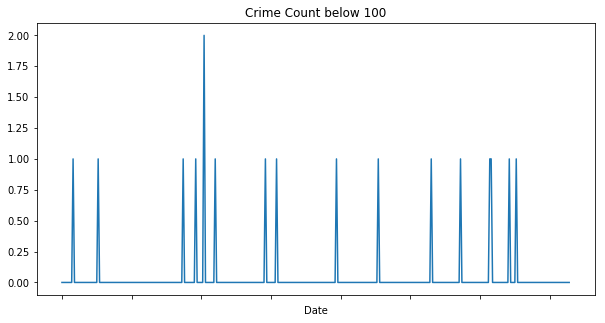

In [6]:
d = ughhh[40]
d["Crime Count"] = d["Crime Count"].astype(int)
ax = d.plot(x ="Date", y = "Crime Count", title = "Crime Count below 100", figsize = (10,5),legend = False)
fig = ax.get_figure()
fig.savefig("!!!!!!below 1000")